In [1]:
%%bash
pip install sklearn
pip install tqdm
pip install mysql
pip install mysqlclient==1.3.4
pip install mysql-python
pip install --upgrade pandas

  Running setup.py bdist_wheel for sklearn: started
  Running setup.py bdist_wheel for sklearn: finished with status 'done'
  Stored in directory: /root/.cache/pip/wheels/d7/db/a3/1b8041ab0be63b5c96c503df8e757cf205c2848cf9ef55f85e
Successfully built sklearn
  Running setup.py bdist_wheel for mysql: started
  Running setup.py bdist_wheel for mysql: finished with status 'done'
  Stored in directory: /root/.cache/pip/wheels/3a/83/02/e5a659e28b517bff04eee83a5fed1f36761afe8d591835cd29
Successfully built mysql
    Complete output from command python setup.py egg_info:
    sh: 1: mysql_config: not found
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "/tmp/pip-build-P4g2XW/mysqlclient/setup.py", line 17, in <module>
        metadata, options = get_config()
      File "setup_posix.py", line 47, in get_config
        libs = mysql_config("libs_r")
      File "setup_posix.py", line 29, in mysql_config
        raise EnvironmentError("%s not found" % (my

/usr/local/lib/python2.7/dist-packages/pip/_vendor/requests/packages/urllib3/util/ssl_.py:318: SNIMissingWarning: An HTTPS request has been made, but the SNI (Subject Name Indication) extension to TLS is not available on this platform. This may cause the server to present an incorrect TLS certificate, which can cause validation failures. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#snimissingwarning.
  SNIMissingWarning
/usr/local/lib/python2.7/dist-packages/pip/_vendor/requests/packages/urllib3/util/ssl_.py:122: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning
/usr/local/lib/pyth

In [3]:
import numpy as np

import os
import inspect
import sys
import pandas as pd
import charts
import time
import math
import datetime
import copy
import MySQLdb

from opengrid.library import houseprint
from scipy.spatial import distance
from scipy.signal import butter, lfilter, freqz
from scipy.signal import argrelextrema
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans

from tqdm import tqdm
from time import sleep

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline
plt.rcParams['figure.figsize'] = 16,8

In [4]:
print (sys.version)

2.7.6 (default, Jun 22 2015, 17:58:13) 
[GCC 4.8.2]


In [5]:
hp = houseprint.Houseprint()

Opening connection to Houseprint sheet
Opening spreadsheets
Parsing spreadsheets
34 Sites created
34 Devices created
97 sensors created
Houseprint parsing complete


#### Get the data you want to check ####

In [64]:
device = hp.find_device('FL03001552')
device.get_sensors()

[
     Fluksosensor
     Key: a6028457292f1866b468b63adcc82ee3
     Type: gas
     , 
     Fluksosensor
     Key: 53b1eb0479c83dee927fff10b0cb0fe6
     Type: electricity
     , 
     Fluksosensor
     Key: 7fae5d2f0354bd3f3681881918a253c8
     Type: electricity
     , 
     Fluksosensor
     Key: 29ba25498c657eda0cdd34bf22d3f9e4
     Type: gas
     , 
     Fluksosensor
     Key: e8fa1a454e137aa36c1adfd9de94406b
     Type: electricity
     , 
     Fluksosensor
     Key: 661684d35cd07dfc657a60b844860785
     Type: water
     ]

In [227]:
#Get Gas data
electr = hp.find_sensor('661684d35cd07dfc657a60b844860785')
df_electr = pd.DataFrame(electr.get_data()) #create dataframe

if(df_electr.size >0):
    start = df_electr.index[-1]  - pd.Timedelta(days=7)
    stop = df_electr.index[-1]
df_el = electr.get_data(start,stop,diff=True,resample='min',  unit='l/min')
df_el_dropna = df_el.dropna()
df_el = pd.DataFrame(df_el)

In [97]:
flukso ='FL03001525'
flukso_and_key = get_all_keys('gas')
current_keys = flukso_and_key.get(flukso) #Get flukso keys for certain flukso

for ind_key in range(0, len(current_keys)):
    current_key = current_keys[ind_key] #get current_key
    print "current key: ", current_key

    device = hp.find_device(flukso) #device from flukso
    sensors = device.get_sensors(sensortype='gas') #get sensor

    electr = hp.find_sensor(str(current_key)) #get data from sensor connected to key

    df_electr = pd.DataFrame(electr.get_data()) #create dataframe

    if(df_electr.size >0):
        start = df_electr.index[-1]  - pd.Timedelta(days=7)
        stop = df_electr.index[-1]
    else:
        print "Empty. Continue to next key."
        continue #empty: we don't want to do anything with this.

    #Get Gas data
    head = start
    tail = stop
    electr = hp.find_sensor('2e2e42c92da420eba8fb9aeea78376fc')
    df_el = electr.get_data(head,tail,diff=True,resample='min',  unit='kW')
    df_el_dropna = df_el.dropna()
    df_el = pd.DataFrame(df_el)
    print start, stop

current key:  1fd6e92d38ccc7ea87793119b7888eec
Empty. Continue to next key.
current key:  ba14f92064072f9783baf27f45a147b4
2017-02-21 19:22:00+00:00 2017-02-28 19:22:00+00:00


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:54: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:65: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:86: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for posi

single positional indexer is out-of-bounds i:  39 blocks size:  39


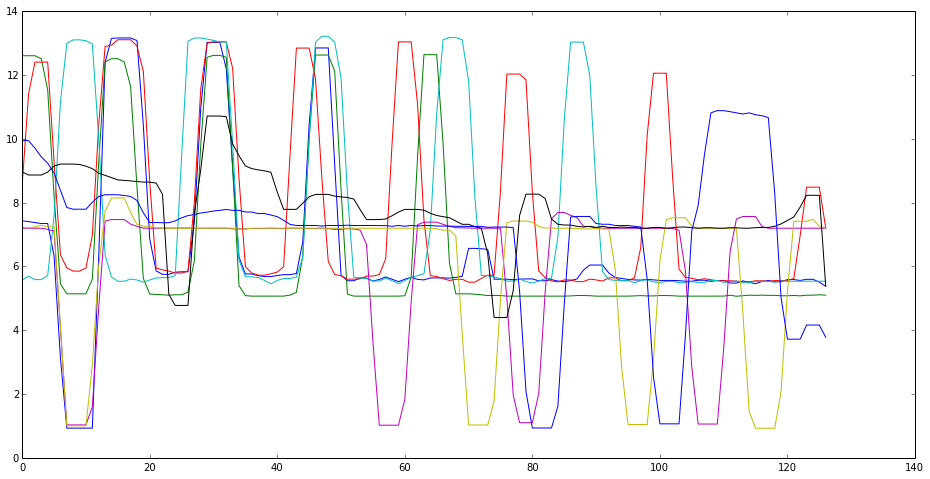

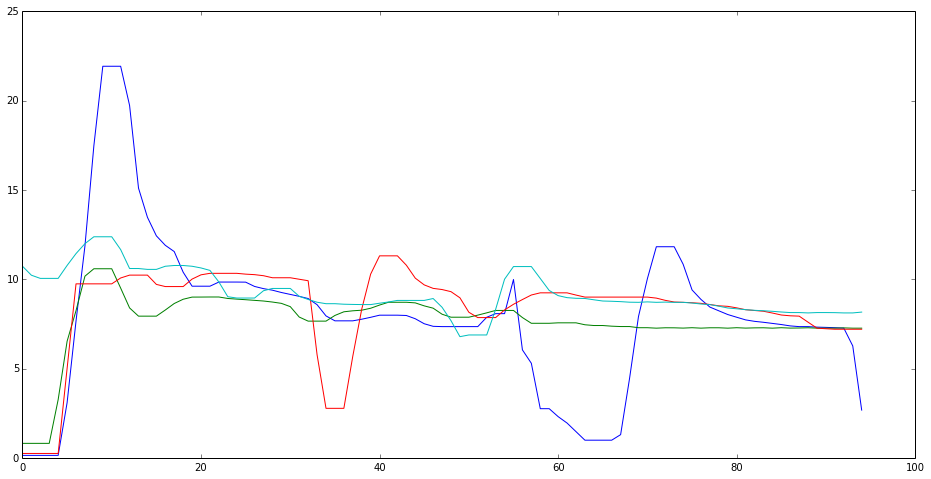

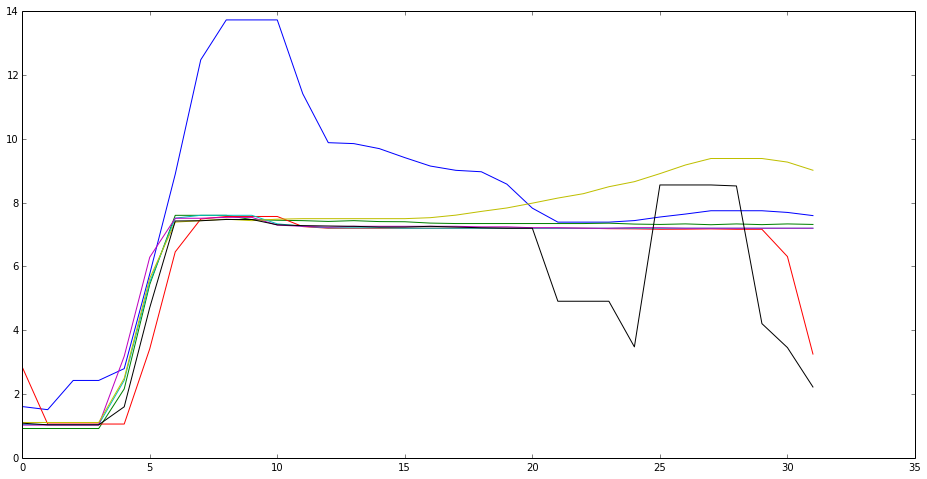

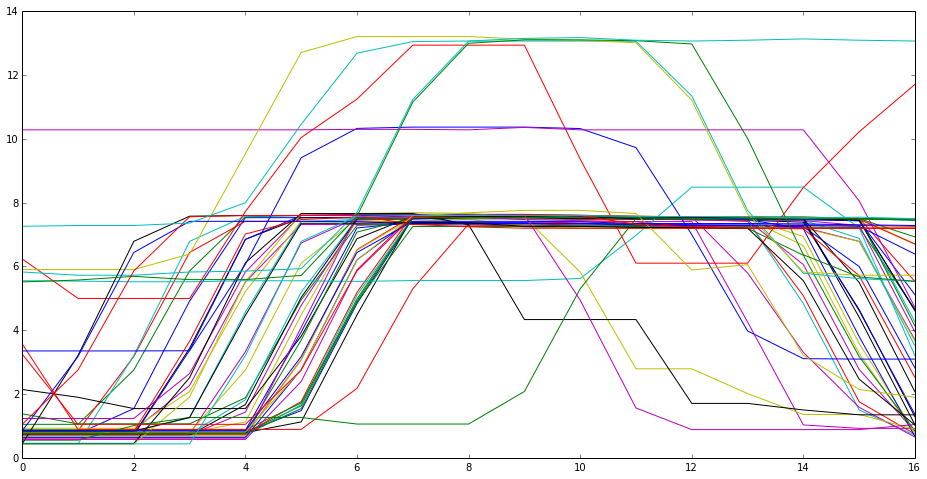

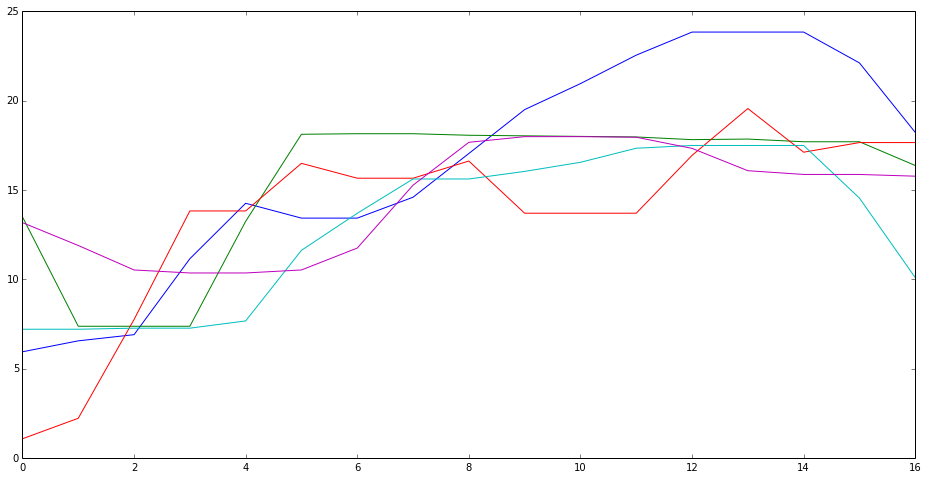

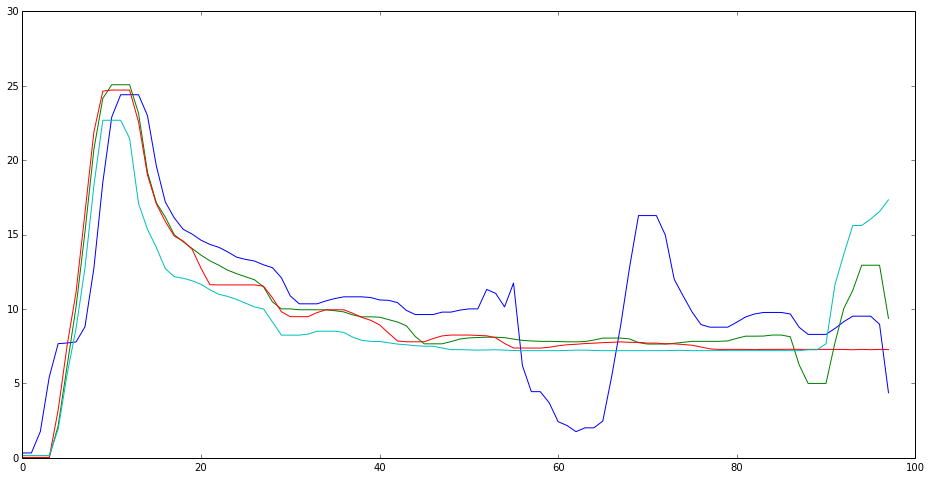

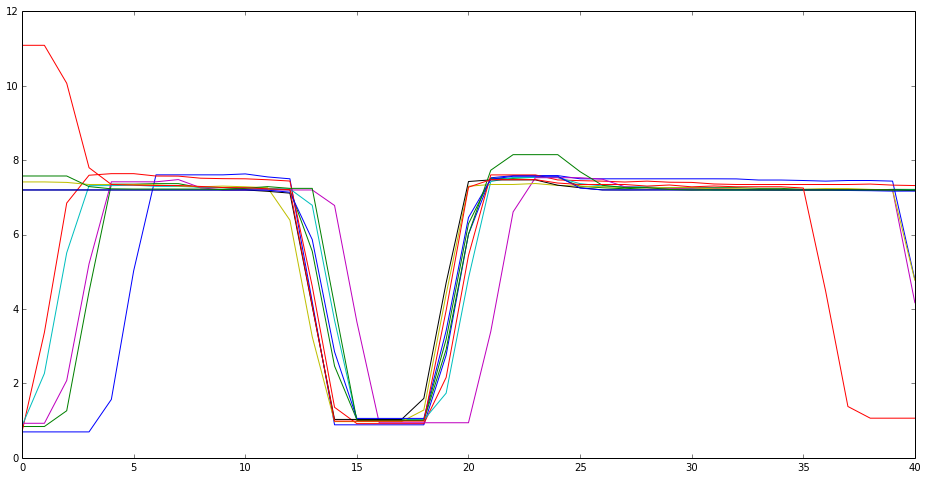

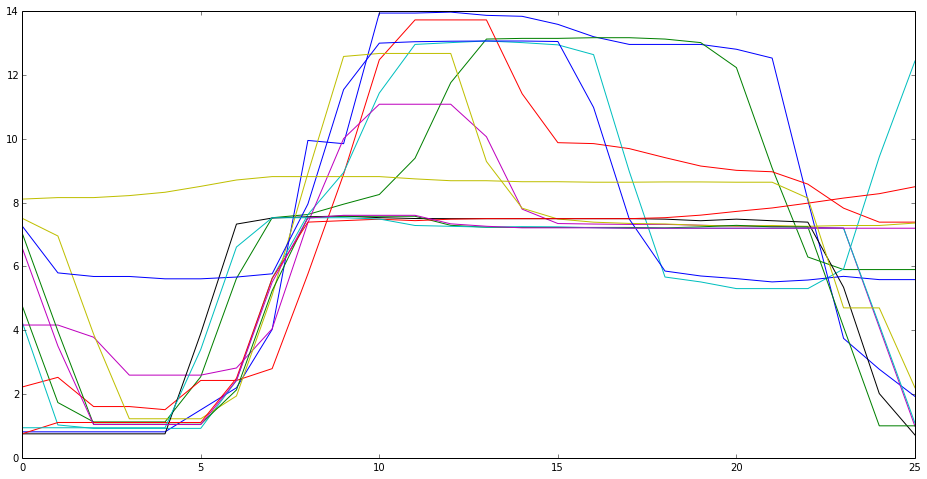

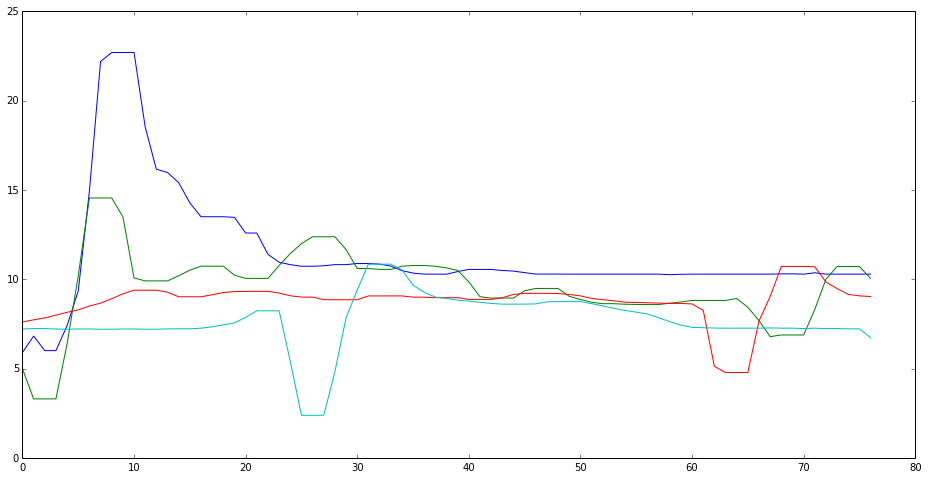

In [104]:
df_types_6, df_rm_6= nilm(df_el) #With check duplicates and get_data
plot_types(df_types_6, df_rm_6) 

In [8]:
charts.plot(df_el.rolling(window=6,center=False).median(), show="inline", stock=True)

# Blockdetection Functions #

 * Z-normalisation
 * PAA-transform
 * SAX-transform
 * Actual blockdetection

In [10]:
def znormalization(ts):
    """
        Args:
            ts (np.array)

        Returns:
            (np.array)
    """
    mus = ts.mean(axis = 0)
    stds = ts.std(axis = 0)
    return (ts - mus) / stds

In [11]:
def paa_transform(ts, n_pieces):
    """
        Args:
            ts (np.array)
            n_pieces (int) : M equally sized piecies into which the original ts is splitted
            
        Returns:
            (np.array) : ts's paa transformation
    """
    splitted = np.array_split(ts, n_pieces) ## along columns as we want
    return np.asarray(map(lambda xs: xs.mean(axis = 0), splitted))

In [12]:
def sax_transform(ts, n_pieces, level_nr):
    """
        Args:
            ts (np.array) 
            n_pieces (int) : number of segments in paa transformation
            level_nr (int) : the amount of levels
        
        Returns: 
            (np.array) : ts's sax transformation
            
    """
    from scipy.stats import norm
    
    levels = np.arange(level_nr)
    
    thrholds = norm.ppf(np.linspace(1./level_nr, 
                                    1-1./level_nr, 
                                    level_nr-1))
    def translate(ts_values):
        return np.asarray([(levels[0] if ts_value < thrholds[0]
                else (levels[-1] if ts_value > thrholds[-1]
                      else levels[np.where(thrholds <= ts_value)[0][-1]+1]))
                           for ts_value in ts_values])
    
    paa_ts = paa_transform(znormalization(ts), n_pieces)
    return np.apply_along_axis(translate, 0, paa_ts)

In [13]:
def manhattanDistance(s1,s2):
    """
        Args:
            s1 (pd.DataFrame)
            s2 (pd.DataFrame)
        
        Returns:
            dist (Float) : Measure of the similarity of s1 and s2
    """
    dist = distance.cityblock(s1,s2)
    return dist

In [14]:
def check_max_consumption(start, stop, parent, threshold=4.0):
    """
        Check if the found block has a certain minimum consumption
        
        Args:
            start (timestamp) : date & time when the found block started
            stop (timestamp) : date & time when the found block ended
            parent (pd.DataFrame) : The parent of the found block
            threshold (int) : Minimum desired consumption
            
        Returns:
            True/ False
    """
    
    head = pd.Timestamp(start)
    tail = pd.Timestamp(stop)
    temp = parent.ix[head:tail]
    
    if float(temp.values.max() - temp.values.min()) < threshold:
        return False
    else:
        return True

In [103]:
def check_duplicate(blocks, start, stop):
    """
        Make sure a child block is different is not the same as its parent
    
        Args:
            blocks (pd.DataFrame) : List of all previously found blocks
            start (timestamp) : date & time when the found block started
            stop (timestamp) : date & time when the found block ended
            
        Return:
            True/ False
            blocks (pd.DataFrame) : List of all previously found blocks
    """
    
    start = pd.Timestamp(start)
    stop = pd.Timestamp(stop)
    
    
    for i in range(0, blocks.index.size):
        try :
            check_start = pd.Timestamp(blocks['start'].iloc[i])
            check_stop = pd.Timestamp(blocks['stop'].iloc[i])

            if start == check_start or stop == check_stop or (start > check_start and stop < check_stop):
                if (stop - start)/(check_stop - check_start) > 0.75:
                    return False, blocks

            if start < check_start and stop > check_stop:
                if (check_stop - check_start)/(stop - start) > 0.75:
                    blocks = blocks.drop(blocks.index[i])
        except Exception as e:
            print e, "i: ", i, "blocks size: ", blocks.index.size
                
            
    return True, blocks
    

In [62]:
def find_blocks(df_parent, row_parent, blocks, df_original, df_rm, first_time = True):
    """
        Args:
            df_parent (pd.DataFrame) : parent block
            row_parent (int) : index of the parent block
            blocks (pd.DataFrame) : List of all previously found blocks
            df_original (pd.DataFrame) : sax-equivalent
            first_time (Boolean)
            df_rm (pd.DataFrame) : rolling mean of orriginal
            
        Returns:
            blocks (pd.DataFrame) : List of all previously found blocks
            
    """
    
    
    min_lvl = 0
    start = False
    
    block_start = 0
    block_end = 0
    index_low = -1
    
    nr_of_blocks_start = blocks.size
    
    nested = row_parent
    
    if first_time:
        start = True
        min_lvl = df_parent['repeatedValues'].min()
        
    #append last value again
    post_index = df_parent.index[-1] + pd.Timedelta(minutes=1)

    temp = pd.DataFrame(data=[df_parent.iloc[-1]], index=[post_index], columns=['repeatedValues'])
    df_parent = df_parent.append(temp)

    df_parent.sort_index(inplace=True)
    
    for i in range(1, df_parent.size-1):
        if start == False and df_parent['repeatedValues'].iloc[i - 1] - df_parent['repeatedValues'].iloc[i] == 0:
            min_lvl = df_parent['repeatedValues'].iloc[i]
            start = True
        
        if start == True and df_parent['repeatedValues'].iloc[i] > min_lvl and df_parent['repeatedValues'].iloc[i - 1] == min_lvl:
            block_start = df_parent.index[i - 1]
            
        if start == True and block_start != 0 and df_parent['repeatedValues'].iloc[i] <= min_lvl:
            block_end = df_parent.index[i]
            
            #Match if the length is more than 10% less than the parent
            temp = pd.DataFrame(data=[[str(block_start), str(block_end), nested]], columns=['start', 'stop', 'nested_in'])
            
            if float(df_parent.index.size - df_parent.ix[block_start : block_end].index.size) / float(df_parent.index.size) > 0.10:
                # check if block is longer than 15 min
                if(block_end - block_start > pd.Timedelta(minutes=15)):
                    # check max consumption is greater than threshold
                    if check_max_consumption(start=block_start, stop=block_end, parent=df_rm):
                        # Check for duplicates
                        check, blocks = check_duplicate(blocks, block_start, block_end)
                        if check:
                            #print [block_start, block_end]
                            blocks = blocks.append(temp, ignore_index=True)
            
            df_parent2 = df_original.ix[block_start : block_end]
            row_parent = blocks.index.size - 1
            blocks = find_blocks(df_parent2, row_parent, blocks, df_original, df_rm, False)
            blocks =  blocks.drop_duplicates(subset=['start', 'stop'], keep= 'first')
            block_start = 0
            block_end = 0
            
        if start == True and block_start == 0 and df_parent['repeatedValues'].iloc[i] < min_lvl:
            #Lvl dropped below min value so the min value was not assigned properly
            # Store the timestamp where the value is the lowest for the first time.
            if index_low == -1:
                index_low = i
                
            if df_parent['repeatedValues'].iloc[index_low] > df_parent['repeatedValues'].iloc[i]:
                index_low = i
            
            if df_parent['repeatedValues'].iloc[i+1] > df_parent['repeatedValues'].iloc[i]:
                
                #Match if the length is more than 10% less than the parent
                temp = pd.DataFrame(data=[[str(df_parent.index[0]), str(df_parent.index[index_low]), nested]], columns=['start', 'stop', 'nested_in'])
            
                if float(df_parent.index.size - df_parent.ix[df_parent.index[0] : df_parent.index[index_low]].index.size) / float(df_parent.index.size) > 0.10:
                    # check if block is longer than 15 min
                    if(df_parent.index[index_low]-df_parent.index[0] > pd.Timedelta(minutes=15)):
                        # check max consumption is greater than threshold
                        if check_max_consumption(start=df_parent.index[0], stop=df_parent.index[index_low], parent=df_rm):
                            # check for duplicates
                            check, blocks = check_duplicate(blocks, df_parent.index[0], df_parent.index[index_low])
                            if check:
                                blocks = blocks.append(temp, ignore_index=True)
                
                min_lvl = df_parent['repeatedValues'].iloc[index_low]
                
    #blocks.reset_index(drop=True, inplace=True)
    return blocks

In [17]:
class MyValidationError(Exception):
    pass

In [18]:
def sax_rm_shortage(dataframe):
    """
        Append values to the sax result to make up for the lost values in the transformation
        
        Args:
            dataframe (pd.DataFrame) : original consumption data
        
        Returns:
            df_repeatedValues (pd.DataFrame) : sax transform
            df_rm (pd.DataFrame) : the rolling mean of the original dataframe
    """
    
    if dataframe.size <= 0:
        raise MyValidationError("Dataframe must have a size bigger than 0")
    
        return None, None
    
    #Take the rolling mean to filter out peaks
    df_rm = dataframe.rolling(window=6,center=False).median()
    df_rm.index = df_rm.index - pd.Timedelta(minutes=3)
    df_rm = df_rm.dropna()
    
    #saxtransform
    lettersToNumSax = pd.DataFrame(sax_transform(df_rm, df_rm.size/3, 16))

    repeatedValues=np.repeat(lettersToNumSax.as_matrix(),3) #expects an array
    #make sure the dataframes are of the same length to join the data and the index
    shortage = df_rm.size - repeatedValues.size
    if shortage > 0:
        repeatedValues = np.append(repeatedValues, [repeatedValues[-1]]*shortage)

    elif shortage < 0:
        repeatedValues = repeatedValues[0:repeatedValues.size + shortage]
    
    shortage = df_rm.size - repeatedValues.size
    
    df_repeatedValues = pd.DataFrame(index=df_rm.index, data= repeatedValues, columns=['repeatedValues'])
    return df_repeatedValues, df_rm
    

In [19]:
def blockdetection(df_repeatedValues, df_rm, show=False):
    """
        Args:
            df_repeatedValues (pd.DataFrame) : sax transform
            df_rm (pd.DataFrame) : the rolling mean of the original dataframe
            show (Boolean) : plot the result or not
        
        Returns:
            df_rm (pd.DataFrame) : the rolling mean of the original dataframe
            blocks (pd.DataFrame) : List of all found blocks
    """    

    #pre- and append a zero to make sure the sample starts and ends with the same value
    for i in range(0, 2):
        pre_index = df_repeatedValues.index[0] - pd.Timedelta(minutes=1)
        post_index = df_repeatedValues.index[-1] + pd.Timedelta(minutes=1)

        temp = pd.DataFrame(data=[df_repeatedValues.min()], index=[pre_index], columns=['repeatedValues'])
        df_repeatedValues = df_repeatedValues.append(temp)

        temp = pd.DataFrame(data=[df_repeatedValues.min()], index=[post_index], columns=['repeatedValues'])
        df_repeatedValues = df_repeatedValues.append(temp)

        df_repeatedValues.sort_index(inplace=True)
    
    #Do the actual searching
    blocks = pd.DataFrame(columns=['start', 'stop', 'nested_in'])
    blocks = find_blocks(df_repeatedValues, -1, blocks, df_repeatedValues, df_rm)
    
    if show:
    
        #plot the dataframe with all the blocks
        fig, ax = plt.subplots()
        ax.plot(df_rm.index, df_rm, color='grey')

        colors = 100*['red', 'blue', 'orange', 'green', 'yellow']


        for i in range(0, blocks.index.size):
            ax.axvspan(str(pd.Timestamp(blocks['start'].iloc[i])), str(pd.Timestamp(blocks['stop'].iloc[i])), alpha=0.1, color=colors[3])

        plt.show()
    
    #return the rolling mean equivalent and the blocks dataframe
    return df_rm, blocks

# Pattern recognition functions #

* Distance metric (Manhattan)
* Clustering
* Clean up results

In [20]:
def keep_local_minima(score_list):
    """
        This function keeps the local minima in the manhattan scores
        
        Args:
            score_list (np.array) : list of all manhattan scores of one sample looped over another
            
        Returns:
            (list) : only the minima
    """
    local_minima_scores = [row[0] for row in score_list]
    arr_n = np.asarray(local_minima_scores)
    df = pd.DataFrame(score_list, columns=["score","start","stop","found in block"])
    tr_f = np.r_[True, arr_n[1:] < arr_n[:-1]] & np.r_[arr_n[:-1] < arr_n[1:], True]
    tr_f_list = tr_f.tolist()
    df_local_minima = df.loc[tr_f_list]
    
    #return df_local_minima.as_matrix(columns=[df_local_minima.columns])
    return df_local_minima.values.tolist()

In [21]:
def find_score(minima_list, score):
    """
        Return the id of a specific score
        
        Args:
            minima_list (list)
            score (Float) : score to find
            
        Returns:
            i (int) : id of the score
    """
    
    for i in range(0, len(minima_list)):
        if minima_list[i][0] == score:
            return i

In [22]:
def ts_correction(local_minima_manhattan):
    """
        If local minima blocks have an overlap the one with the best score is kept
        
        Args:
            local_minima_manhattan (pd.DataFrame) : contains matching blocks
            
        Returns:
            result_list_n (pd.DataFrame) : contains matching blocks without overlap
    """
    
    result_list_n=[]
    max_value = 0
    
    for i in range(0, local_minima_manhattan.index.size):
        current_row = local_minima_manhattan.iloc[i]
        if(i==0):
            result_list_n.append(current_row)
        else:
            previous_row  = result_list_n[len(result_list_n)-1]
            if(current_row['start'] >= previous_row['start']) and (current_row['start'] <= previous_row['stop']):
                #Inside
                if(current_row[0] <= previous_row[0]):
                    ind = find_score(result_list_n, previous_row[0])
                    result_list_n[ind] = current_row
            #Outside
            else:
                result_list_n.append(current_row)
    
    return result_list_n

In [23]:
#def calculate_threshold_value(df_result, nr_of_best_values, factor):
#    """
#        A thresholdvalue is calculated based on the x best matches
#        
#        Args:
#            df_result (pd.DataFrame) : contains allmatches for 1 block
#            nr_of_best_values (int)
#            factor (Float)
#            
#        Returns
#            (pd.DataFrame) : The thresholded list
#            
#        
#    """
#    
#    if df_result.index.size < nr_of_best_values:
#        nr_of_best_values = 1
#    
#    list_of_best_values=[]
#    i = 0
#    for i in range(0, nr_of_best_values):
#        list_of_best_values.append(df_result.iloc[i])
#    list_of_best_values=pd.DataFrame(list_of_best_values)
#    mean=list_of_best_values.mean()
#    threshold=mean*factor
#    
#    return df_result.loc[df_result['score']<=threshold[0]]



def calculate_threshold_value(df_result, nr_of_best_values, factor):
    df_result.sort_values("score")
    threshold = df_result[0:nr_of_best_values].mean() * factor
    return df_result.loc[df_result['score']<=threshold[0]]

In [24]:
def split(original, event_list, parts):
    """
        Split the resulting matches in an amount of parts and store their means
        
        Args:
            original (pd.DataFrame) : block we were looking for
            event_list (pd.DataFrame) : contains allmatches for the original block
            parts (int)
            
        Returns:
            (pd.DataFrame)
    """
    
    cols = []
    for i in range(0, parts):
        cols.extend(['part_' + str(i)])
        
    cols.extend(['start_value'])
    cols.extend(['stop_value'])
    
    parts_df = pd.DataFrame(columns=cols, index=event_list.index)
    
    for i in range(0, event_list.index.size):
        part_length = (event_list['stop'].iloc[i] - event_list['start'].iloc[i])/parts
        
        prev_end_time = event_list['start'].iloc[i]
        for j in range(0, parts):
            part_median = original.ix[prev_end_time: prev_end_time + part_length].mean().iloc[0]
            prev_end_time = prev_end_time + part_length
            index = event_list.index[i]
            
            parts_df.set_value(index, 'part_' + str(j), part_median)
        
        parts_df.set_value(event_list.index[i], 'start_value', original[original.columns[0]].loc[event_list['start'].iloc[i]])
        parts_df.set_value(event_list.index[i], 'stop_value', original[original.columns[0]].loc[event_list['stop'].iloc[i]])
            
    split_list = pd.concat([event_list, parts_df],axis=1)
    
    return split_list.sort_values('score')

In [25]:
def cluster(matches, parts):
    """
        Cluster best matches to label them as beeing a true match or not
        
        Args:
            matches (pd.DataFrame)
            parts (int)
            
        Returns:
            (pd.DataFrame)
    """
    
    
    cluster_data = []
    cluster_data = [(matches['score']/matches['score'].max()).as_matrix()]
    for i in range(0, parts):
        cluster_data.extend([(matches['part_' + str(i)]/matches['part_' + str(i)].max()).as_matrix()])
        
    cluster_data.extend([(matches['start_value']/matches['start_value'].max()).as_matrix()])
    cluster_data.extend([(matches['stop_value']/matches['stop_value'].max()).as_matrix()])
        
    df_result = pd.DataFrame(data=cluster_data).transpose()
    
    
    
    result=df_result.as_matrix()
    
    ms = MeanShift()
    ms.fit(result)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    n_cluster = len(np.unique(labels))
    colors = 10*['g.', 'r.', 'c.', 'b.', 'k.', 'y.', 'm.']
    
    try:
        del split_matches['Type']
        matches.insert(loc=0, column='Type', value=labels)
    except Exception as e:
        matches.insert(loc=0, column='Type', value=labels)
    
    return matches

In [26]:
def compare(df_to_find, df_to_check, manhattan_list, block_index):
    """
        Args:
            df_to_find (pd.DataFrame): The block you are looking for.
            df_to_check (DataFrame): The block to which you are comparing.
            manhattan_list (array): list of manhattan scores for df_to_find.

        Returns:
            result_list (array): List of manhattan scores
    """
    manhattan_list = []
    result_list = []
    for i in range(0, df_to_check.index.size - df_to_find.index.size + 1):
        frame = df_to_check[i : i + df_to_find.index.size]
        manhattan_distance = manhattanDistance(frame, df_to_find)
    
        start_ts = frame.index[0]
        stop_ts = frame.index[-1]
        if (i==0) or (manhattan_distance != result_list[len(result_list)-1][0]):
            result_list.append([manhattan_distance, start_ts, stop_ts, block_index])

    if len(result_list) > 0:
        result_list = keep_local_minima(result_list)
    return manhattan_list + result_list

In [27]:
def check_overlap(possible_list, start, stop):
    """
        Check if the matched piece clearly corresponds to a previously found block
        
        Args:
            possible_list (pd.DataFrame) : list with possible matches
            start (timestamp)
            stop (timestamp)
            
        Returns
            (int) : id of the corresponding block (or -2 if none)
    """
    
    for i in range(0, possible_list.index.size):
        
        if pd.Timestamp(start) >= pd.Timestamp(possible_list['start'].iloc[i]) and pd.Timestamp(stop) <= pd.Timestamp(possible_list['stop'].iloc[i]):
            return possible_list.index[i]
        elif pd.Timestamp(start) >= pd.Timestamp(possible_list['start'].iloc[i]) and pd.Timestamp(stop) >= pd.Timestamp(possible_list['stop'].iloc[i]):
            if (pd.Timestamp(possible_list['stop'].iloc[i]) - pd.Timestamp(start))/(pd.Timestamp(stop) - pd.Timestamp(start)) >= 0.9:
                return possible_list.index[i]
        elif pd.Timestamp(start) <= pd.Timestamp(possible_list['start'].iloc[i]) and pd.Timestamp(stop) <= pd.Timestamp(possible_list['stop'].iloc[i]):
            if (pd.Timestamp(stop) - pd.Timestamp(possible_list['start'].iloc[i]))/(pd.Timestamp(stop) - pd.Timestamp(start)) >= 0.9:
                return possible_list.index[i]
            
    return -2

In [28]:
def compare_all(index, blocks, df_rm, block_type, df_types):
    """
        Args:
            index (int) : index of the block you are looking for
            blocks (pd.DataFrame) : list with all found blocks
            df_rm (pd.DataFrame) : rolling mean of the original consumption
            block_type (int) : Type assigned to all matches of the block you are looking for
            df_types (pd.DataFrame) : list with all types
            
        Returns:
            block_type + 1 (int)
            blocks (pd.DataFrame)
            df_types (pd.DataFrame)
    """
    
    start_to_find = blocks['start'].iloc[index]
    stop_to_find = blocks['stop'].iloc[index]
    df_to_find = df_rm.ix[pd.Timestamp(start_to_find):pd.Timestamp(stop_to_find)]
    
    manhattan_list = []
    
    for i in range(0, blocks.index.size):
        if index != i and blocks['nested_in'].iloc[i] == -1:
            
            start_to_check = blocks['start'].iloc[i]
            stop_to_check = blocks['stop'].iloc[i]
            df_to_check = df_rm.ix[pd.Timestamp(start_to_check):pd.Timestamp(stop_to_check)]
            manhattan_list = manhattan_list + compare(df_to_find, df_to_check, manhattan_list, i)
    
    if (len(manhattan_list) > 0):
        ts_corrected_manhattan = ts_correction(pd.DataFrame(manhattan_list, columns=["score","start","stop","found in block"]))
        if (len(ts_corrected_manhattan) > 0):
            thresholded_manhatten = calculate_threshold_value(pd.DataFrame(ts_corrected_manhattan, columns=["score","start","stop","found in block"]), 10, 1.1)
            
            split_nr = df_to_find.index.size - 1
                
            split_manhatten = split(df_rm, pd.DataFrame(thresholded_manhatten, columns=["score","start","stop","found in block"]), split_nr)
            
            if split_manhatten.index.size > 3:
                split_matches = cluster(split_manhatten, split_nr)
            
                type_overlap = [block_type]
                
                df_types = df_types.append(pd.DataFrame(data=[[str(blocks['start'].iloc[index]), str(blocks['stop'].iloc[index]), block_type]], columns=['start', 'stop', 'type']), ignore_index=True)
                
                for j in range(0, split_matches.index.size):
                    if split_matches['Type'].iloc[j] == split_matches['Type'].iloc[0]:
                        
                        temp = df_rm.ix[split_matches['start'].iloc[j] : split_matches['stop'].iloc[j]]
                        if max(temp.values) - min(temp.values) > 4: #AANGEPAST
                            #plt.plot(temp)
                            
                            temp = pd.DataFrame(data= [[str(split_matches['start'].iloc[j]), str(split_matches['stop'].iloc[j]), block_type]], columns=['start', 'stop', 'type'])
                            df_types = df_types.append(temp, ignore_index=True)
                        
                        # This is a match for df_to_find
                        # assign a type to the block it was found in
                        parent = split_matches['found in block'].iloc[j]
                        found = False
                        while not found:
                            possible_block_matches = blocks.loc[blocks['nested_in'] == parent]
                            temp_parent = check_overlap(possible_block_matches, split_matches['start'].iloc[j], split_matches['stop'].iloc[j])
                            
                            if temp_parent == -2:
                                # no block found
                                # assign type to temp_parent block
                                if math.isnan(blocks['Type'].loc[parent]):
                                    blocks['Type'].loc[parent] = block_type
                                else:
                                    type_overlap.append(blocks['Type'].loc[parent])
                                
                                found = True
                            else:
                                # parent block found, chick its children
                                parent = temp_parent
                
                #plt.plot(df_rm.ix[blocks['start'].iloc[index] : blocks['stop'].iloc[index]])
                #plt.show()
                    
    return block_type + 1, blocks, df_types

In [29]:
def merge_types(df_types):
    """
        If two types have a few exact same blocks they should be merged
        
        Args:
            df_types (pd.DataFrame) : list with all types
            
        Returns:
            df_types (pd.DataFrame) : list with all types
    """
    
    df_types = df_types.drop_duplicates(subset=['start', 'stop', 'type'], keep='first')

    type_indexes = df_types['type'].drop_duplicates()

    for i in range(0, type_indexes.index.size):
        type_1 = type_indexes.iloc[i]

        j = 0
        while j < type_indexes.index.size:
            type_2 = type_indexes.iloc[j]

            size_1 = df_types[df_types['type'].isin([type_1, type_2])].index.size
            size_2 = df_types[df_types['type'].isin([type_1, type_2])].drop_duplicates(subset=['start', 'stop'], keep='first').index.size

            j = j + 1
            if size_1 - size_2 >= 4:
                df_types = df_types.replace(to_replace=[type_1, type_2], value=type_1).drop_duplicates(subset=['start', 'stop', 'type'], keep='first')
                j = 0
                
    return df_types

In [30]:
def drop_small(df_types):
    """
        Drop types that have insufficiant occurances
        
        Args:
            df_types (pd.DataFrame) : list with all types
            
        Returns:
            df_types (pd.DataFrame) : list with all types
    """
    
    # If a type has less than 4 occurances we discard the type
    type_indexes = df_types['type'].drop_duplicates()
    for i in range(0, type_indexes.index.size):
        type_1 = type_indexes.iloc[i]

        if df_types[df_types['type'] == type_1].index.size < 4:
            df_types = df_types[df_types['type'] != type_1]
            
    return df_types

In [31]:
def reindex_types(df_types):
    """
        Since some types have been merged or removed we want to reindex them
        
        Args:
            df_types (pd.DataFrame) : list with all types
            
        Returns:
            df_types (pd.DataFrame) : list with all types
    """
    
    type_indexes = df_types['type'].drop_duplicates()
    for i in range(0, type_indexes.index.size):
        index = type_indexes.iloc[i]
        df_types = df_types.replace(to_replace=[index], value=i)
        
    return df_types

In [32]:
def handle_duplicates(df_types):
    """
        If two types have overlapping blocks they should be merged or one of them should be removed
        
        Args:
            df_types (pd.DataFrame) : list with all types
            
        Returns:
            df_types (pd.DataFrame) : list with all types
    """
    df_merge = pd.DataFrame(columns=['type_1', 'type_2'])
    df_blocks_to_merge = pd.DataFrame(columns=['first', 'start_1', 'stop_1', 'start_2', 'stop_2'])
    
    type_indexes = df_types['type'].drop_duplicates()

    for i in range(0, type_indexes.index.size):
        type_1 = type_indexes.iloc[i]


        for j in range(i, type_indexes.index.size):
            overlap = 0
            type_2 = type_indexes.iloc[j]
            
            if type_1 != type_2:

                list_1 = df_types[df_types['type'] == type_1]
                list_2 = df_types[df_types['type'] == type_2]
                for a in range(0, list_1.index.size):

                    for b in range(0, list_2.index.size):

                        if pd.Timestamp(list_1['start'].iloc[a]) >= pd.Timestamp(list_2['start'].iloc[b]) and pd.Timestamp(list_1['stop'].iloc[a]) <= pd.Timestamp(list_2['stop'].iloc[b]):
                            # sample a of list 1 is completely inside sample b of list 2:
                            # Remove sample a from list 1
                            index_a = list_1.index[a]
                            df_types = df_types[df_types.index != index_a]

                        elif pd.Timestamp(list_1['start'].iloc[a]) <= pd.Timestamp(list_2['start'].iloc[b]) and pd.Timestamp(list_1['stop'].iloc[a]) >= pd.Timestamp(list_2['stop'].iloc[b]):
                            # sample b of list 2 is completely inside sample a of list 1:
                            # Remove sample b from list 2
                            index_b = list_2.index[b]
                            df_types = df_types[df_types.index != index_b]
                            
                        elif pd.Timestamp(list_1['start'].iloc[a]) <= pd.Timestamp(list_2['start'].iloc[b]) and pd.Timestamp(list_1['stop'].iloc[a]) <= pd.Timestamp(list_2['stop'].iloc[b]) and pd.Timestamp(list_1['stop'].iloc[a]) >= pd.Timestamp(list_2['start'].iloc[b]):
                            #partial overlap
                            if (pd.Timestamp(list_1['stop'].iloc[a]) - pd.Timestamp(list_2['start'].iloc[b])) / (pd.Timestamp(list_2['stop'].iloc[b]) - pd.Timestamp(list_1['start'].iloc[a])) >= 0.80:
                                overlap = overlap + 1
                                df_blocks_to_merge = df_blocks_to_merge.append(pd.DataFrame(data=[[type_1, list_1['start'].iloc[a], list_1['stop'].iloc[a], list_2['start'].iloc[b], list_2['stop'].iloc[b]]], columns=['first', 'start_1', 'stop_1', 'start_2', 'stop_2']))
                                
                        elif pd.Timestamp(list_2['start'].iloc[b]) <= pd.Timestamp(list_1['start'].iloc[a]) and pd.Timestamp(list_2['stop'].iloc[b]) <= pd.Timestamp(list_1['stop'].iloc[a]) and pd.Timestamp(list_2['stop'].iloc[b]) >= pd.Timestamp(list_1['start'].iloc[a]):
                            #partial overlap
                            if (pd.Timestamp(list_2['stop'].iloc[b]) - pd.Timestamp(list_1['start'].iloc[a])) / (pd.Timestamp(list_1['stop'].iloc[a]) - pd.Timestamp(list_2['start'].iloc[b])) >= 0.80:
                                overlap = overlap + 1
                                df_blocks_to_merge = df_blocks_to_merge.append(pd.DataFrame(data=[[type_2, list_2['start'].iloc[b], list_2['stop'].iloc[b], list_1['start'].iloc[a], list_1['stop'].iloc[a]]], columns=['first', 'start_1', 'stop_1', 'start_2', 'stop_2']))
                                
                    
                if overlap > 3:
                    # Merge Type_1 and Type_2
                    df_merge = df_merge.append(pd.DataFrame(data=[[type_1, type_2]], columns=['type_1', 'type_2']),ignore_index = True)
                    
                    # Remove overlapping blocks and add a new block that wraps both of them
                    for k in range(0, df_blocks_to_merge.index.size):
                        if df_types[(df_types.start == df_blocks_to_merge['start_1'].iloc[k]) & (df_types.stop == df_blocks_to_merge['stop_1'].iloc[k])].index.size > 0:
                            index_to_remove_1 = df_types[(df_types.start == df_blocks_to_merge['start_1'].iloc[k]) & (df_types.stop == df_blocks_to_merge['stop_1'].iloc[k])].index[0]
                            df_types = df_types[df_types.index != index_to_remove_1]
                        
                        if df_types[(df_types.start == df_blocks_to_merge['start_2'].iloc[k]) & (df_types.stop == df_blocks_to_merge['stop_2'].iloc[k])].index.size > 0:
                            index_to_remove_2 = df_types[(df_types.start == df_blocks_to_merge['start_2'].iloc[k]) & (df_types.stop == df_blocks_to_merge['stop_2'].iloc[k])].index[0]
                            df_types = df_types[df_types.index != index_to_remove_2]
                        
                        df_types = df_types.append(pd.DataFrame(data=[[df_blocks_to_merge['start_1'].iloc[k], df_blocks_to_merge['stop_2'].iloc[k], df_blocks_to_merge['first'].iloc[k]]], columns=['start', 'stop', 'type']), ignore_index=True)
                        
                        
                        
    for i in range(0, df_merge.index.size):
        df_types = df_types.replace(to_replace=[df_merge['type_2'].iloc[i]], value=df_merge['type_1'].iloc[i])
    
    return df_types

In [33]:
def find_types(blocks, df_rm):
    """
        The total pattern recognition functio
        
        Args:
            blocks (pd.DataFrame) : list with all previously found blocks
            df_rm (pd.DataFrame) : rolling mean of the original consumption
            
        Returns:
            df_types (pd.DataFrame) : list of all types
    """

    try:
        del blocks['Type']
        blocks = blocks.join(pd.DataFrame(columns=['Type']))
    except Exception as e:
        blocks = blocks.join(pd.DataFrame(columns=['Type']))

    block_type = 0
    df_types = pd.DataFrame(columns=['start', 'stop', 'type'])
    
#     pbar = tqdm(total=blocks.index.size + 4, bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt}', desc='Matching types')
    #for i in tqdm(range(0, blocks.index.size), bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt}', desc='Matching types'):
    for i in range(0, blocks.index.size):

        # Check if the block you want to find already has a type
        if math.isnan(blocks['Type'].iloc[i]):
            block_type, blocks, df_types = compare_all(i, blocks, df_rm, block_type, df_types)
            
        # update pbar
#         pbar.update(1)
    
    # Clean up the found types
    df_types = merge_types(df_types)
#     pbar.update(1)
    df_types = drop_small(df_types)
#     pbar.update(1)
    df_types = reindex_types(df_types)
#     pbar.update(1)
    df_types = handle_duplicates(df_types)
#     pbar.update(1)
    
            
    df_types = drop_small(df_types)
#     pbar.update(1)
    df_types = reindex_types(df_types)
#     pbar.update(1)
    return df_types

# Plotting functions #

In [34]:
def plot_types(df_types, df_rm):
    """
        Plot all found matches
        
        Args:
            df_types (pd.DataFrame) : list containing all types
            df_rm (pd.DataFrame) : rolling mean of original consumption
    """
    
    type_indexes = df_types['type'].drop_duplicates()
    for i in range(0, type_indexes.index.size):
        index = type_indexes.iloc[i]

        temp = df_types[df_types['type'] == index]
        for j in range(0, temp.index.size):
            pot = df_rm.ix[temp['start'].iloc[j] : temp['stop'].iloc[j]]
            plt.plot(pot) 
        plt.show()

In [35]:
def plot_coverage(df_types, df_rm):
    
    #plot the dataframe with all the blocks
    fig, ax = plt.subplots()
    ax.plot(df_rm.index, df_rm, color='grey')

    colors = 100*['red', 'blue', 'orange', 'green', 'yellow', 'purple']

    for i in range(0, df_types.index.size):
        ax.axvspan(str(pd.Timestamp(df_types['start'].iloc[i])), str(pd.Timestamp(df_types['stop'].iloc[i])), alpha=0.1, color=colors[int(df_types['type'].iloc[i])])

    plt.show()

# Non intrusive load monitoring function #

In [36]:
def nilm(df_cons):

    try:
        #block detection
        frame, df_rm=sax_rm_shortage(df_cons)
        originalrm, blocks = blockdetection(frame, df_rm, False)

        #type detection
        df_types = find_types(blocks, df_rm)

    except MyValidationError as exception:
        # handle exception here and get error message
        print exception
    
    return df_types, df_rm

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:54: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:65: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:86: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for posi

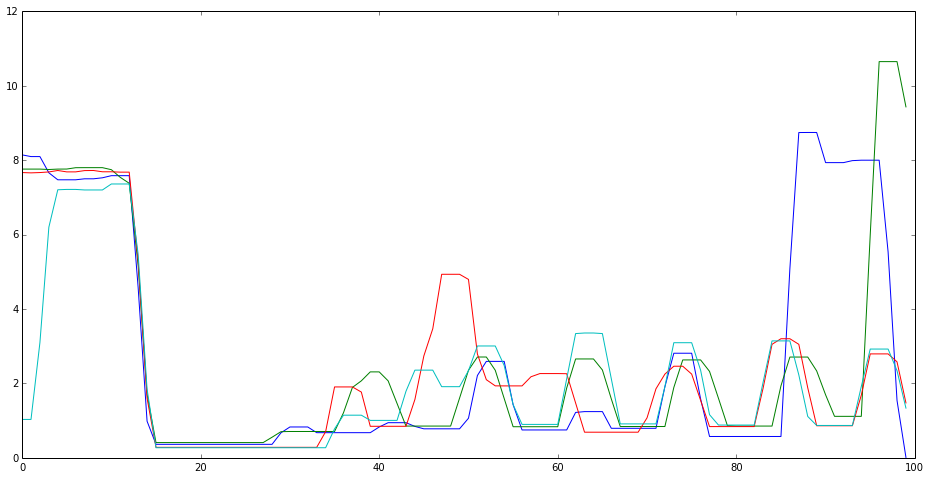

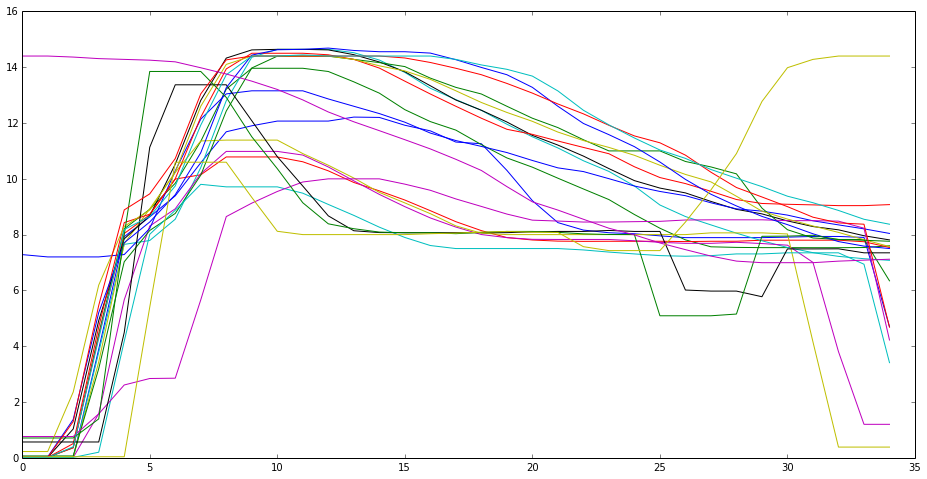

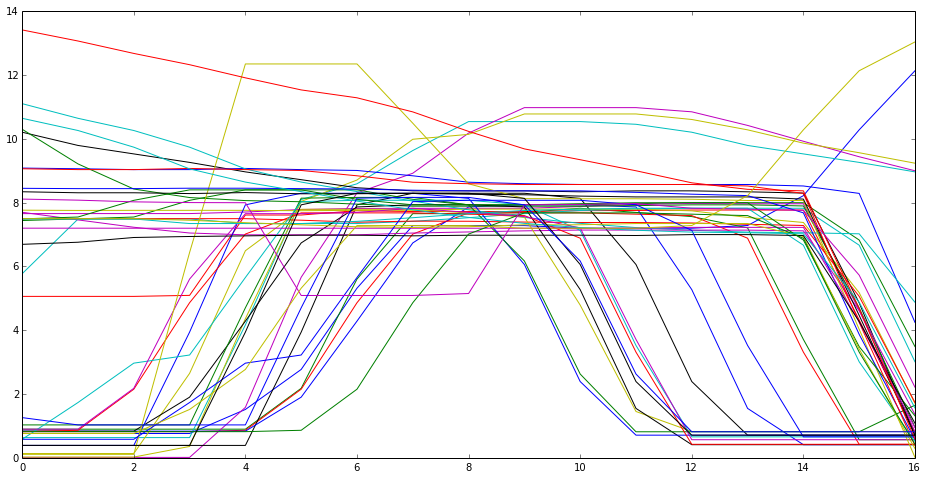

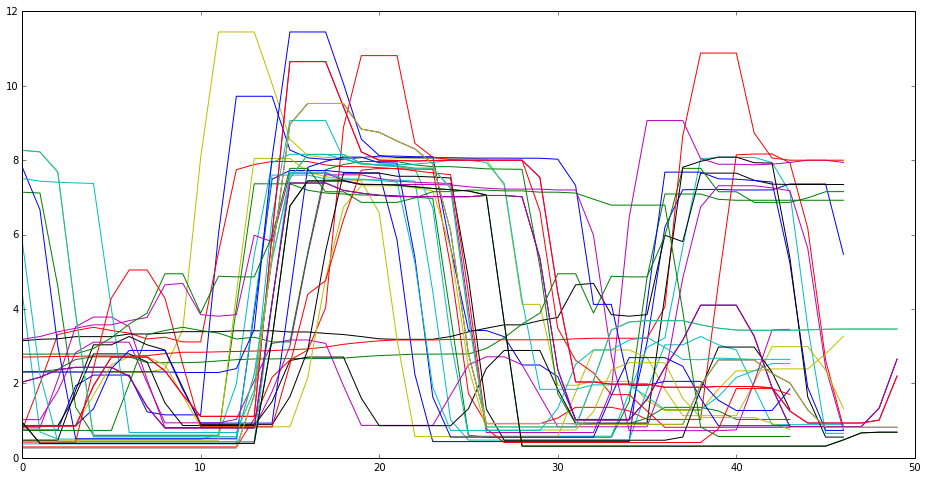

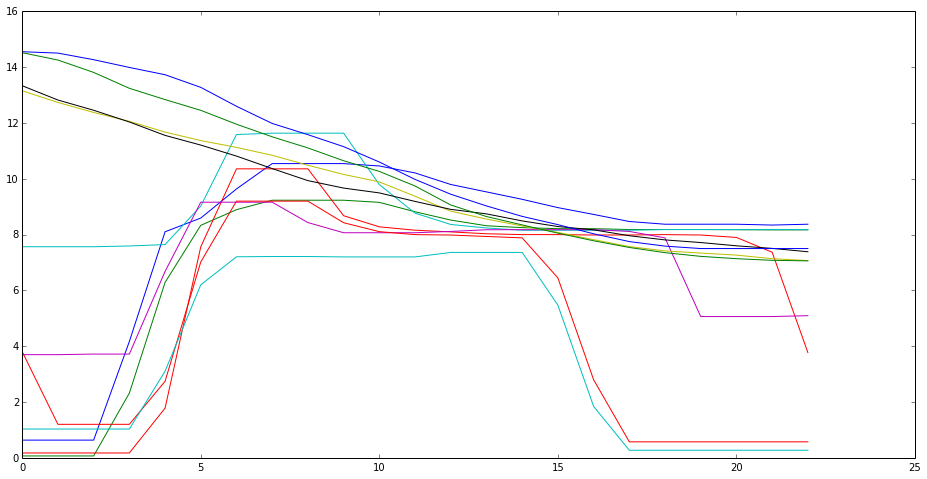

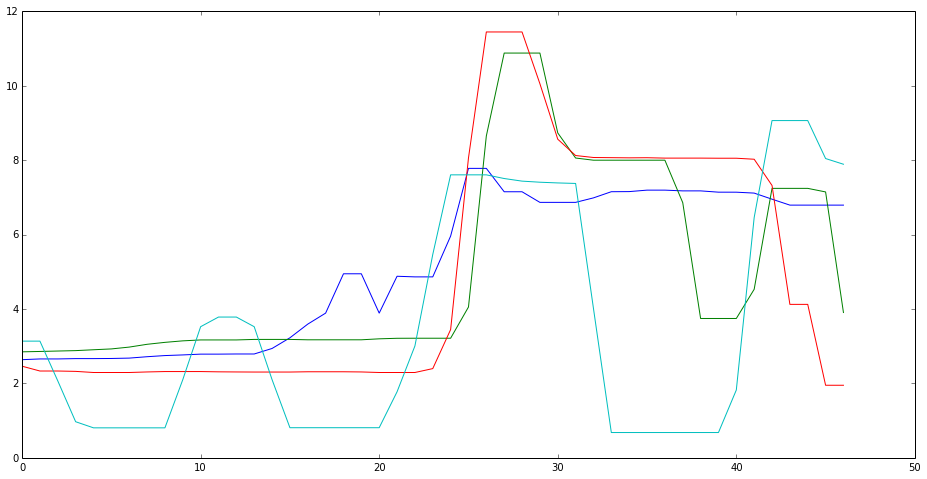

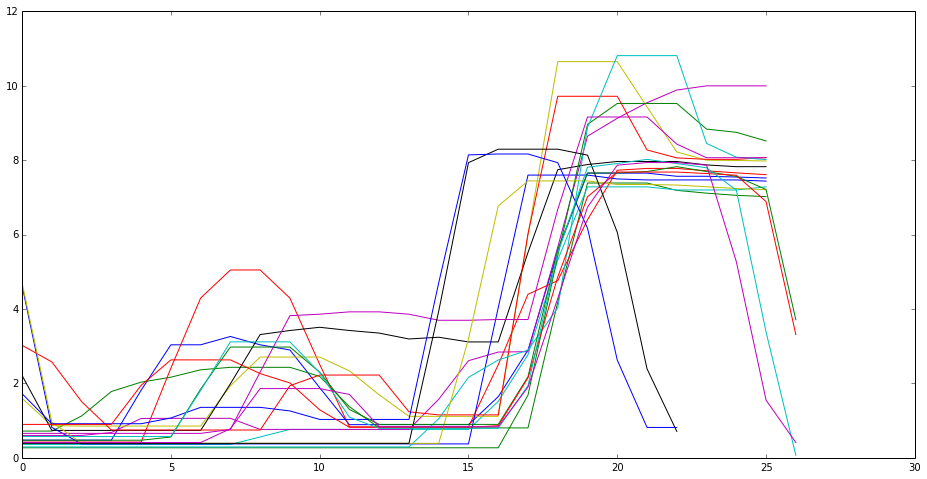

In [635]:
plot_types(df_types_2, df_rm_2)

In [ ]:
plot_types(df_types, df_rm)

# Usage #

* get the desired data
* run the algorithm

Pickle

In [102]:
import pickle

In [103]:
# pickle_out = open("df_rm_18.pickle", "wb")
# pickle.dump(df_rm, pickle_out)
# pickle_out.close()
# pickle_in = open("df_rm_18.pickle", "rb")
# example_rm = pickle.load(pickle_in)

In [104]:
# pickle_out = open("df_types_18.pickle", "wb")
# pickle.dump(df_types, pickle_out)
# pickle_out.close()
# pickle_in = open("df_types_18.pickle", "rb")
# example = pickle.load(pickle_in)

In [105]:
pickle_in = open("df_types_18.pickle", "rb")
example = pickle.load(pickle_in)

pickle_in = open("df_rm_18.pickle", "rb")
example_rm = pickle.load(pickle_in)

<h2> MySQL Connection </h2> 

In [131]:
import MySQLdb


In [215]:
db.close()

ProgrammingError: closing a closed connection

In [216]:
db = MySQLdb.connect(host="thinkcore.be",   #your host, usually localhost
                     user="deb72907",       #your username
                     passwd="krDWtXeDHa",   #your password
                     db="deb72907_nilmdb",  #name of the data baseb
                     port=3306)        

<h2> Functions and queries </h2>

Create cursor object to execute the queries

In [217]:
cur = db.cursor()
hp = houseprint.Houseprint()

Opening connection to Houseprint sheet
Opening spreadsheets
Parsing spreadsheets
34 Sites created
34 Devices created
97 sensors created
Houseprint parsing complete


In [218]:
def return_user_ID(user_name_f):
    cur.execute(find_user_ID, user_name_f)
    for row in cur.fetchall():
        return row[0]

In [219]:
def return_flukso_from_user(user_name_f):
    cur.execute(find_flukso_ID, return_user_ID(user_name_f))
    for row in cur.fetchall():
        return row[0]

In [220]:
def return_user_ID_from_flukso(flukso_ID):
    cur.execute(find_userID_from_flukso, flukso_ID)
    for row in cur.fetchall():
        return row[0]

In [221]:
def return_appliance_ID(user_ID):
    cur.execute(get_appliance_ID, user_ID)
    for row in cur.fetchall():
        return row[0]

<h3> Inserting data in the database </h3>

Start the writing by executing the query statements

In [222]:
#dB Queries
add_user = ("INSERT INTO Users (F_Name, L_Name, Email, Password) VALUES(%s, %s, %s, %s)")
# data_user = ('Brent', 'Ceyssens', 'brent@hotmail.com', 'qsddd')

find_user_ID = ("SELECT ID FROM Users WHERE F_Name = %s")
# first_name = ('Brent')

find_flukso_ID = ("SELECT FL_ID FROM Fluksos WHERE Users_ID = %s")

add_flukso_ID = ("INSERT INTO Fluksos (FL_ID, Users_ID) VALUES(%s, %s)")
# data_flukso = ('FL03001241', data_user[0])

find_userID_from_flukso = ("SELECT Users_ID FROM Fluksos WHERE FL_ID = %s")

add_appliances = ("INSERT INTO Appliances"
                  "(Users_ID, Name, Avg_duration, Avg_pk_consumption, Avg_tot_consumption, Count, Type, Avg_price_per_occ, Total_price, Percentage)"
                 "VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s, %s)")
# data_appliances = (return_user_ID('Jean-Baptiste'), 'Aparaat', avg_dur, avg_peak_cons, avg_total_cons, count, type_, 35, 100)

get_appliance_ID = ("SELECT App_ID FROM Appliances WHERE Users_ID = %s")

add_occurances = ("INSERT INTO Occurances"
                  "(Start, Duration, Pk_cons, Tot_cons,Appliances_App_ID, Price, User_told)"
                 "VALUES (%s,%s,%s,%s,%s,%s,%s)")

add_datapoints = ("INSERT INTO Datapoints"
                 "(Occurances_Occ_ID, Value, Datapoints.index)"
                 "VALUES (%s,%s,%s)")

get_occurance_ID = ("SELECT Occ_ID FROM Occurances")

In [158]:
data_appliances = (1, 'Aparaat', 2.0, 3.0, 4.0, 5, 1, 35, 100, 10)
cur.execute(add_appliances, data_appliances)
db.commit()

In [78]:
device = hp.find_device(return_flukso_from_user('Willow'))
sensors = device.get_sensors(sensortype='gas')

for i in range(0, len(sensors)):
    # Get sensor key
    key = str(sensors[i]).splitlines()[2][9:]
    
    # Get sensor for that key
    electr = hp.find_sensor(str(key))

Get the data from the key

In [23]:
#Get Gas data
head = pd.Timestamp('20151110')
tail = pd.Timestamp('20151118')
electr = hp.find_sensor(key)
df_el = electr.get_data(head,tail,diff=True,resample='min', unit ='kW')
df_el_dropna = df_el.dropna()
df_el = pd.DataFrame(df_el)

Using tmpo database from /data/.tmpo/tmpo.sqlite3


Get df_types needed appliances, occurances and datapoins

In [332]:
df_types, df_rm = nilm(df_el)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:54: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:65: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:86: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for posi

IndexError: single positional indexer is out-of-bounds

Adding user and data_flukso

<h2> Loading in fluksos <h2>

In [175]:
st = time.time()
data_flukso_list = []
for i in range(0, len(flukso_list)):
    data_flukso_list.append((flukso_list[i], i+1))
cur.executemany(add_flukso_ID, data_flukso_list)
db.commit()
print time.time()-st

0.444651126862


In [79]:
def get_all_fluksos():
    all_fluksos = hp.get_devices()
    flukso_list=[]
    for i in range(0, len(all_fluksos)):
            # Get list
            flukso_list.append(str(all_fluksos[i]).splitlines()[2][9:])
    return flukso_list

In [80]:
flukso_list = get_all_fluksos()

In [81]:
def get_all_keys(type_):
    flukso_list = get_all_fluksos()
    sensor_list, key_list, data_list = [],[],[]
    flukso_and_key=[]
    for i in range(0, len(flukso_list)):
        device = hp.find_device(flukso_list[i]) # get devices
        sensor = device.get_sensors(sensortype=type_) # get sensors with gas type
        key_list=[]
        for j in range(0, len(sensor)):
            key_list.append(str(sensor[j]).splitlines()[2][9:])
        if(i ==0) and (len(sensor) >0):
            flukso_and_key = {flukso_list[i] : key_list}
        elif (len(sensor)>0):
            flukso_and_key.update({flukso_list[i] : key_list})
    return flukso_and_key

In [85]:
device = hp.find_device('FL03001552')
sensors = device.get_sensors(sensortype='gas')

for i in range(0, len(sensors)):
    # Get sensor key
    
    key = str(sensors[i]).splitlines()[2][9:]
    print key
    # Get sensor for that key
    electr = hp.find_sensor(str(key))
    df_electr = pd.DataFrame(electr.get_data())

    if(df_electr.size >0):
        start = df_electr.index[-1]  - pd.Timedelta(days=7)
        stop = df_electr.index[-1]
    else:
        print "back to start of loop", start
        continue

    #Get Gas data
    head = start
    tail = stop
    electr = hp.find_sensor(key)
    df_el = electr.get_data(head,tail,diff=True,resample='min',  unit='kW')
    df_el_dropna = df_el.dropna()
    df_el = pd.DataFrame(df_el)

a6028457292f1866b468b63adcc82ee3
29ba25498c657eda0cdd34bf22d3f9e4
back to start of loop 2017-02-21 19:26:00+00:00


In [106]:
flukso ='FL03001441'
flukso_and_key = get_all_keys('electricity')
current_keys = flukso_and_key.get(flukso) #Get flukso keys for certain flukso

for ind_key in range(0, len(current_keys)):
    current_key = current_keys[ind_key] #get current_key
    print "current key: ", current_key

    device = hp.find_device(flukso) #device from flukso
    sensors = device.get_sensors(sensortype='electricity') #get sensor

    electr = hp.find_sensor(str(current_key)) #get data from sensor connected to key

    df_electr = pd.DataFrame(electr.get_data()) #create dataframe

    if(df_electr.size >0):
        start = df_electr.index[-1]  - pd.Timedelta(days=7)
        stop = df_electr.index[-1]
    else:
        print "Empty. Continue to next key."
        continue #empty: we don't want to do anything with this.

    #Get Gas data
    head = start
    tail = stop
    electr = hp.find_sensor('2e2e42c92da420eba8fb9aeea78376fc')
    df_el = electr.get_data(head,tail,diff=True,resample='min',  unit='kW')
    df_el_dropna = df_el.dropna()
    df_el = pd.DataFrame(df_el)
    print start, stop

current key:  81fb589c911e808daa96a2064bebed41


KeyboardInterrupt: 

In [68]:
flukso ='FL03001525'
flukso_and_key = get_all_keys('gas')
current_keys = flukso_and_key.get(flukso) #Get flukso keys for certain flukso

for ind_key in range(0, len(current_keys)):
    current_key = current_keys[ind_key] #get current_key
    print "current key: ", current_key

    device = hp.find_device(flukso) #device from flukso
    sensors = device.get_sensors(sensortype='gas') #get sensor

    electr = hp.find_sensor(str(current_key)) #get data from sensor connected to key

    df_electr = pd.DataFrame(electr.get_data()) #create dataframe

    if(df_electr.size >0):
        start = df_electr.index[-1]  - pd.Timedelta(days=7)
        stop = df_electr.index[-1]
    else:
        print "Empty. Continue to next key."
        continue #empty: we don't want to do anything with this.

    #Get Gas data
    head = start
    tail = stop
    electr = hp.find_sensor(current_key)
    df_el = electr.get_data(head,tail,diff=True,resample='min',  unit='kW')
    df_el_dropna = df_el.dropna()
    df_el = pd.DataFrame(df_el)

NameError: name 'get_all_keys' is not defined

In [147]:
list_ = [264.57805368826376, 258.49163202473716, 235.74608507046943, 206.81045812255761]

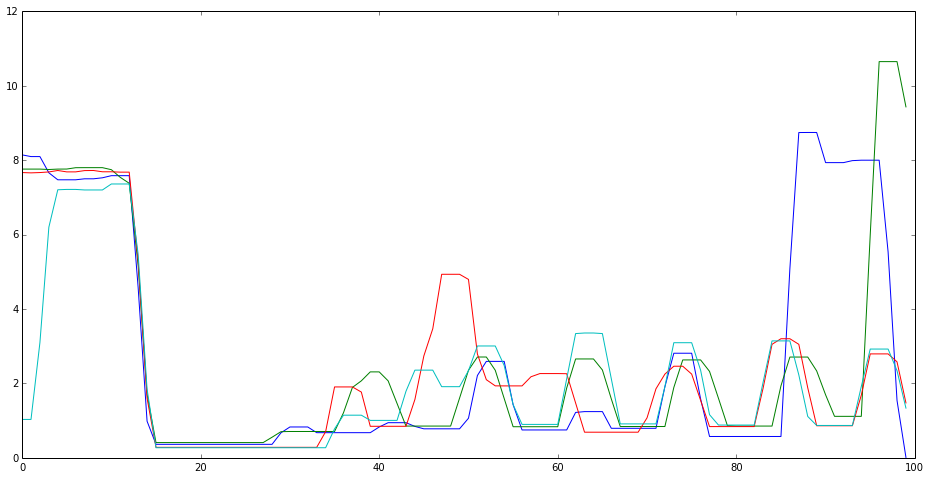

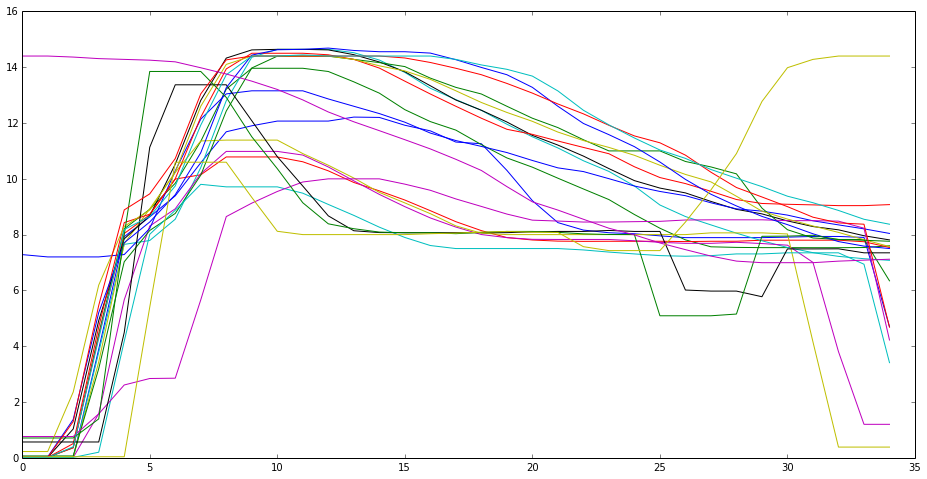

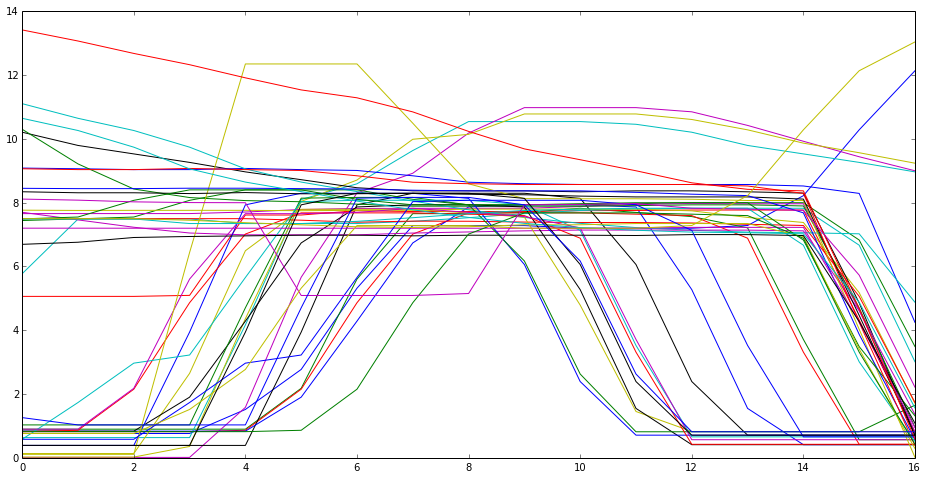

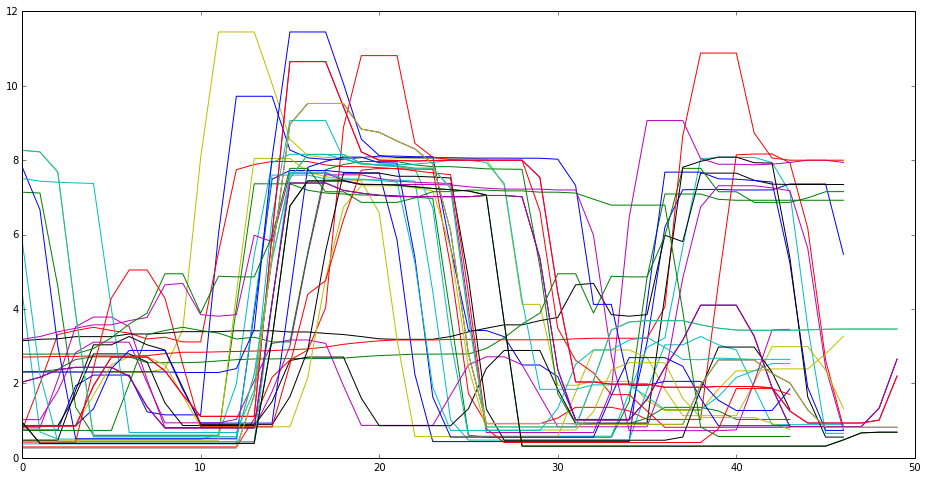

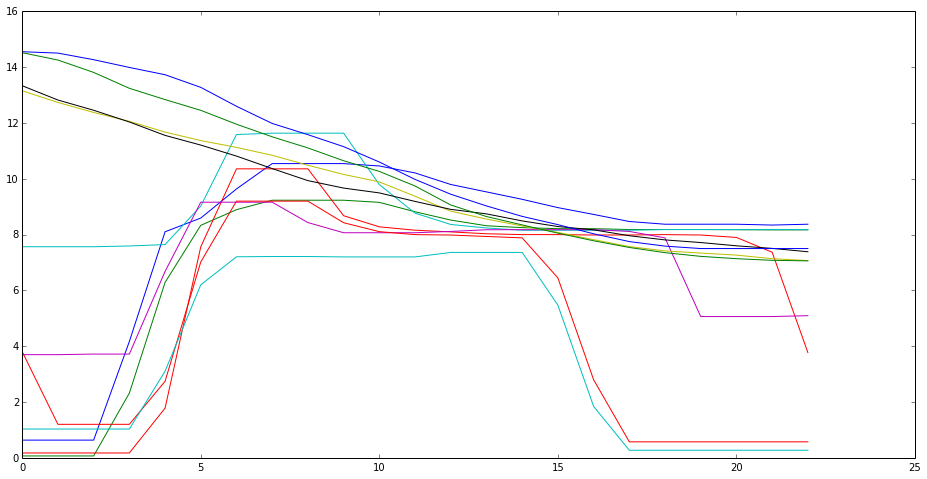

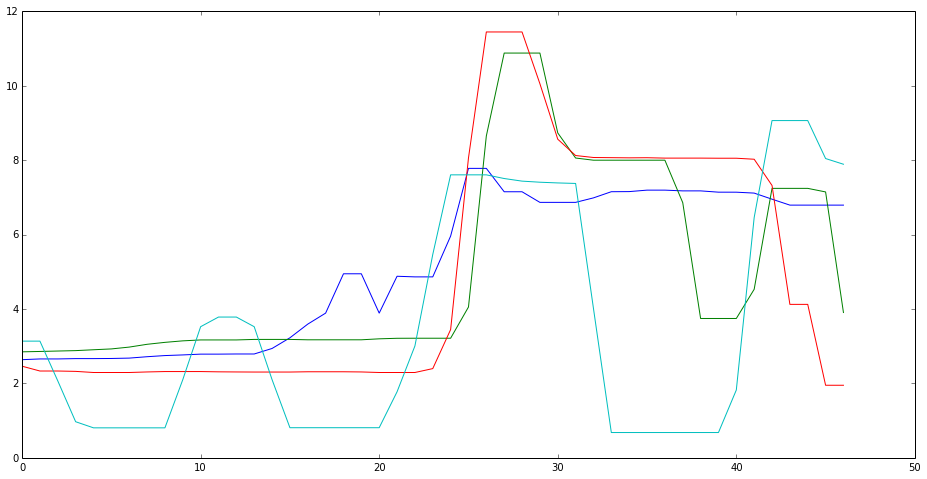

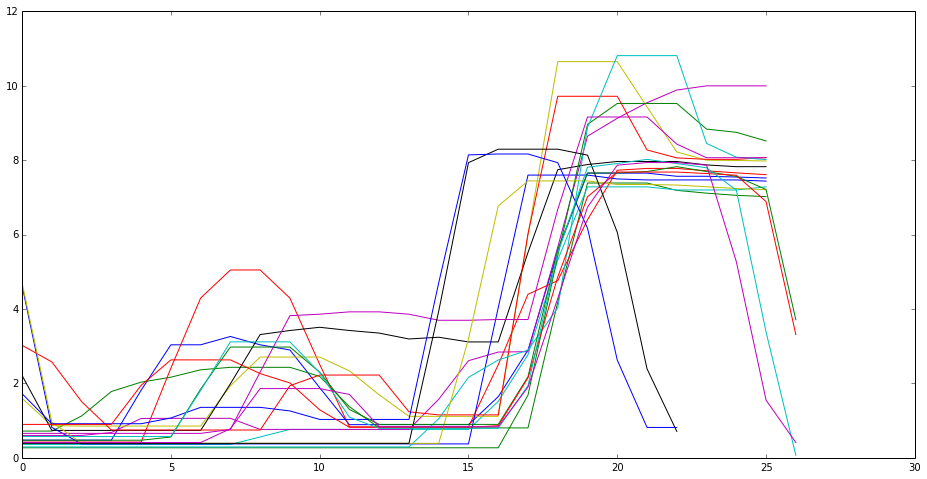

In [161]:
plot_types(df_types, df_rm)

current flukso:  FL03001441 keys:  ['212ce724e124fbde0fb649396375d099']
current key:  212ce724e124fbde0fb649396375d099


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:54: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:65: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:86: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for posi

[264.57805368826376]
[264.57805368826376, 258.49163202473716]
[264.57805368826376, 258.49163202473716, 235.74608507046943]
[264.57805368826376, 258.49163202473716, 235.74608507046943, 206.81045812255761]


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:82: Warning: Data truncated for column 'Start' at row 1


[298.96952793775711]
[298.96952793775711, 321.33843714169632]
[298.96952793775711, 321.33843714169632, 273.29521026893929]
[298.96952793775711, 321.33843714169632, 273.29521026893929, 333.84797639285682]
[298.96952793775711, 321.33843714169632, 273.29521026893929, 333.84797639285682, 248.46760548488234]
[298.96952793775711, 321.33843714169632, 273.29521026893929, 333.84797639285682, 248.46760548488234, 252.51997353414191]
[298.96952793775711, 321.33843714169632, 273.29521026893929, 333.84797639285682, 248.46760548488234, 252.51997353414191, 352.4087392143411]
[298.96952793775711, 321.33843714169632, 273.29521026893929, 333.84797639285682, 248.46760548488234, 252.51997353414191, 352.4087392143411, 352.94920164513167]
[298.96952793775711, 321.33843714169632, 273.29521026893929, 333.84797639285682, 248.46760548488234, 252.51997353414191, 352.4087392143411, 352.94920164513167, 348.67063317853604]
[298.96952793775711, 321.33843714169632, 273.29521026893929, 333.84797639285682, 248.467605484

In [ ]:
 #Get Gas data
    head = start
    tail = stop
    electr = hp.find_sensor('2e2e42c92da420eba8fb9aeea78376fc')
    df_el = electr.get_data(head,tail,diff=True,resample='min',  unit='kW')
    df_el_dropna = df_el.dropna()
    df_el = pd.DataFrame(df_el)
    print start, stop

In [ ]:
flukso ='FL03001525'
flukso_and_key = get_all_keys('gas')
current_keys = flukso_and_key.get(flukso) #Get flukso keys for certain flukso

for ind_key in range(0, len(current_keys)):
    current_key = current_keys[ind_key] #get current_key
    print "current key: ", current_key

    electr = hp.find_sensor(str(current_key)) #get data from sensor connected to key

    df_electr = pd.DataFrame(electr.get_data()) #create dataframe

    if(df_electr.size >0):
        start = df_electr.index[-1]  - pd.Timedelta(days=7)
        stop = df_electr.index[-1]
    else:
        print "Empty. Continue to next key."
        continue #empty: we don't want to do anything with this.

    #Get Gas data
    head = start
    tail = stop
    electr = hp.find_sensor('2e2e42c92da420eba8fb9aeea78376fc')
    df_el = electr.get_data(head,tail,diff=True,resample='min',  unit='kW')
    df_el_dropna = df_el.dropna()
    df_el = pd.DataFrame(df_el)
    print start, stop

In [190]:
def test_fc(t1,t2):
    print t1,t2

In [231]:
# load_in_data_for_all_fluksos(flukso_list_v2, 'gas')
# load_in_data_for_all_fluksos(flukso_list_v2, 'water')
load_in_data_for_all_fluksos(flukso_list_v2, 'electricity')

current flukso:  FL03001441 keys:  ['81fb589c911e808daa96a2064bebed41', '156e0abc64b00c5e98dbd3c17883b5f6', 'e5306ee3a4235498592fc89ee0ede353']
current key:  81fb589c911e808daa96a2064bebed41


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:54: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:65: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:86: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for posi

current key:  156e0abc64b00c5e98dbd3c17883b5f6
single positional indexer is out-of-bounds i:  96 blocks size:  96
current key:  e5306ee3a4235498592fc89ee0ede353
single positional indexer is out-of-bounds i:  26 blocks size:  26


(                         start                       stop  type
 0    2017-02-22 09:24:00+00:00  2017-02-22 09:52:00+00:00     0
 2    2017-02-22 11:07:00+00:00  2017-02-22 11:35:00+00:00     0
 3    2017-02-26 15:18:00+00:00  2017-02-26 15:46:00+00:00     0
 4    2017-02-25 15:40:00+00:00  2017-02-25 16:08:00+00:00     0
 5    2017-02-27 10:29:00+00:00  2017-02-27 10:57:00+00:00     0
 6    2017-02-27 11:19:00+00:00  2017-02-27 11:47:00+00:00     0
 7    2017-02-23 09:27:00+00:00  2017-02-23 09:55:00+00:00     0
 8    2017-02-26 07:45:00+00:00  2017-02-26 08:13:00+00:00     0
 10   2017-02-26 07:09:00+00:00  2017-02-26 07:37:00+00:00     0
 11   2017-02-22 11:44:00+00:00  2017-02-22 12:12:00+00:00     0
 12   2017-02-23 10:26:00+00:00  2017-02-23 10:54:00+00:00     0
 14   2017-02-22 10:01:00+00:00  2017-02-22 10:29:00+00:00     0
 16   2017-02-26 13:29:00+00:00  2017-02-26 13:57:00+00:00     0
 17   2017-02-28 15:48:00+00:00  2017-02-28 16:16:00+00:00     0
 19   2017-02-24 09:42:00

In [230]:
#Kan nog niet voor alle fluksos want dan moet ik ook weten welke type en welke starttijd enzo?
def load_in_data_for_all_fluksos(flukso_list, type_):

    flukso_and_key = get_all_keys(type_) #Get fluksos vs keys
    for ind_flukso in range(0, len(flukso_list)):
        flukso = flukso_list[ind_flukso]
        current_keys = flukso_and_key.get(flukso) #Get flukso keys for certain flukso
        
        print "current flukso: ", flukso, "keys: ", current_keys
        
        for ind_key in range(0, len(current_keys)):
            current_key = current_keys[ind_key] #get current_key
            print "current key: ", current_key
            electr = hp.find_sensor(str(current_key)) #get data from sensor connected to key

#           df_electr = pd.DataFrame(electr.get_data(resample = 'min', unit ='kW')) #create dataframe

            df_electr = pd.DataFrame(electr.get_data()) #Load in all data for this sensor
            if(df_electr.size >0):
            
                # Get only the last 7 days
                start = df_electr.index[-1]  - pd.Timedelta(days=7)
                stop = df_electr.index[-1]
                
            else:
                print "Empty. Continue to next key."
                continue #empty: we don't want to do anything with this.

            #Get Gas data
            head = start
            tail = stop
            
            #Find type of sensor
            type_ = hp.find_sensor(current_key).type
            
            if(type_ == 'gas'):
                unit_type = 'W'
            elif(type_ == 'water'):
                unit_type = 'l/min'
            elif(type_ == 'electricity'):
                unit_type = 'W'
            
            df_el = electr.get_data(head,tail,diff=True,resample='min', unit = unit_type)
            df_el = pd.DataFrame(df_el)

            df_types, df_rm = nilm(df_el) #start NILM algorithm

            #Start implementing data
            start_time = time.time()
            duration_l, peak_cons_l, total_cons_l= [],[],[]

            
            #Find amount of types, loop through all types

            amount_of_types = df_types['type'].max()
            if not(np.isnan(amount_of_types)):
                for m in range(0, amount_of_types+1):
                    temp = df_types[df_types['type'] == m]
                    for j in range(0, temp.index.size):

                        #Appliances
                        duration_l.append(abs(pd.Timestamp(temp['start'].iloc[j]) - pd.Timestamp(temp['stop'].iloc[j])))
                        peak_cons_l.append(df_rm.ix[temp['start'].iloc[j] : temp['stop'].iloc[j]].max()[0])
                        total_cons_l.append(df_rm.ix[temp['start'].iloc[j] : temp['stop'].iloc[j]].sum()[0])

                    #Calculate average durationss after finished looping for the type
                    [avg_dur, avg_peak_cons, avg_total_cons, count, type_] = [(pd.DataFrame(duration_l).mean()[0]).seconds/60.0,
                                                                pd.DataFrame(peak_cons_l).mean()[0],
                                                                pd.DataFrame(total_cons_l).mean()[0], temp.index.size, type_]
                    duration_l, peak_cons_l, total_cons_l=[],[],[]

                    #Add appliance after df_types is finished with looping    
                    data_appliances = (return_user_ID_from_flukso(flukso), 'Aparaat', avg_dur, avg_peak_cons, avg_total_cons, count, type_, 35, 100, 10)
                    cur.execute(add_appliances, data_appliances)
                    current_appliance_ID  = db.insert_id()

                    #Occurances
                    for b in range(0, temp.index.size):
                        start = temp['start'].iloc[b]
                        values = df_rm.ix[temp['start'].iloc[b]:temp['stop'].iloc[b]]
                        duration = abs(pd.Timestamp(temp['start'].iloc[b])-pd.Timestamp(temp['stop'].iloc[b])).seconds/60
                        pk_cons = df_rm.ix[temp['start'].iloc[b] : temp['stop'].iloc[b]].max()
                        tot_cons = df_rm.ix[temp['start'].iloc[b]: temp['stop'].iloc[b]].sum()
                        price = 10.0
                        user_told = bool(False)

                        data_occurances = (start, duration, pk_cons[0], tot_cons[0],current_appliance_ID, price, user_told)
                        cur.execute(add_occurances, data_occurances)
                        current_occurance_ID = db.insert_id()      

                        #Datapoints
                        data_datapoints=[]
                        for i in range(0, values.index.size):
                            data_datapoints.append((current_occurance_ID, float(values.iloc[i][0]), i))
                        cur.executemany(add_datapoints, data_datapoints)
            else:
                continue
        db.commit()
    return df_types, df_rm, df_el
    print "total time" ,time.time()-start_time
#     plot_types(df_types, df_rm)

In [ ]:
#Kan nog niet voor alle fluksos want dan moet ik ook weten welke type en welke starttijd enzo?
def load_in_data_for_all_fluksos():

    flukso_and_key = get_all_keys('gas')
    
    for ind in range(0, len(flukso_list)): #Loop through list of fluksos
        current_keys = flukso_and_key.get(flukso_list[ind]) #Get flukso keys for certain flukso
        
        for ind_key in range(0, len(current_keys)):
            current_key = current_keys[ind_key] #get current_key
            
            # Get sensor for that key
            electr = hp.find_sensor(str(current_key))

            # Get Gas data
            head = pd.Timestamp('20151110') # Define start time
            tail = pd.Timestamp('20151118') # Define stop time
            df_el = electr.get_data(head,tail,diff=True,resample='min',  unit='kW')
            df_el = pd.DataFrame(df_el)

            #Start implementing data
            start_time = time.time()
            duration_l, peak_cons_l, total_cons_l= [],[],[]

            #Find type of sensor
            type_ = hp.find_sensor(key).type

            #Find amount of types, loop through all types
            for m in range(0, df_types['type'].max()):
                temp = df_types[df_types['type'] == m]
                for j in range(0, temp.index.size):

                    #Appliances
                    duration_l.append(abs(pd.Timestamp(temp['start'].iloc[j]) - pd.Timestamp(temp['stop'].iloc[j])))
                    peak_cons_l.append(df_rm.ix[temp['start'].iloc[j] : temp['stop'].iloc[j]].max()[0])
                    total_cons_l.append(df_rm.ix[temp['start'].iloc[j] : temp['stop'].iloc[j]].sum()[0])

                #Calculate average durationss after finished looping for the type
                [avg_dur, avg_peak_cons, avg_total_cons, count, type_] = [(pd.DataFrame(duration_l).mean()[0]).seconds/60.0,
                                                            pd.DataFrame(peak_cons_l).mean()[0],
                                                            pd.DataFrame(total_cons_l).mean()[0], temp.index.size, type_]
                duration_l, peak_cons_l, total_cons_l=[],[],[]

                #Add appliance after df_types is finished with looping    
                data_appliances = (return_user_ID(first_name), 'Aparaat', avg_dur, avg_peak_cons, avg_total_cons, count, type_, 35, 100)
                cur.execute(add_appliances, data_appliances)
                current_appliance_ID  = db.insert_id()

                #Occurances
                for b in range(0, temp.index.size):
                    start = temp['start'].iloc[b]
                    values = df_rm.ix[temp['start'].iloc[b]:temp['stop'].iloc[b]]
                    duration = abs(pd.Timestamp(temp['start'].iloc[b])-pd.Timestamp(temp['stop'].iloc[b])).seconds/60
                    pk_cons = df_rm.ix[temp['start'].iloc[b] : temp['stop'].iloc[b]].max()
                    tot_cons = df_rm.ix[temp['start'].iloc[b]: temp['stop'].iloc[b]].sum()
                    price = 10.0
                    user_told = bool(False)

                    data_occurances = (start, duration, pk_cons[0], tot_cons[0],current_appliance_ID, price, user_told)
                    cur.execute(add_occurances, data_occurances)
                    current_occurance_ID = db.insert_id()      

                    #Datapoints
                    data_datapoints=[]
                    for i in range(0, values.index.size):
                        data_datapoints.append((current_occurance_ID, float(values.iloc[i][0]), i))
                    cur.executemany(add_datapoints, data_datapoints)
            db.commit()
        print "total time" ,time.time()-start_time

In [42]:
#Kan nog niet voor alle fluksos want dan moet ik ook weten welke type en welke starttijd enzo?
def load_in_data_for_user(first_name):

    #Get device and sensors
    device = hp.find_device(return_flukso_from_user(first_name))
    sensors = device.get_sensors(sensortype='gas')

    #Generate key and data
    for i in range(0, len(sensors)):
        # Get sensor key
        key = str(sensors[i]).splitlines()[2][9:]

        # Get sensor for that key
        electr = hp.find_sensor(str(key))
        
    # Get Gas data
    head = pd.Timestamp('20151110') # Define start time
    tail = pd.Timestamp('20151118') # Define stop time
    df_el = electr.get_data(head,tail,diff=True,resample='min',  unit='kW')
    df_el = pd.DataFrame(df_el)
    
    #Start implementing data
    start_time = time.time()
    duration_l, peak_cons_l, total_cons_l= [],[],[]
    
    #Find type of sensor
    type_ = hp.find_sensor(key).type

    #Find amount of types, loop through all types
    for m in range(0, df_types['type'].max()):
        temp = df_types[df_types['type'] == m]
        for j in range(0, temp.index.size):

            #Appliances
            duration_l.append(abs(pd.Timestamp(temp['start'].iloc[j]) - pd.Timestamp(temp['stop'].iloc[j])))
            peak_cons_l.append(df_rm.ix[temp['start'].iloc[j] : temp['stop'].iloc[j]].max()[0])
            total_cons_l.append(df_rm.ix[temp['start'].iloc[j] : temp['stop'].iloc[j]].sum()[0])

        #Calculate average durationss after finished looping for the type
        [avg_dur, avg_peak_cons, avg_total_cons, count, type_] = [(pd.DataFrame(duration_l).mean()[0]).seconds/60.0,
                                                    pd.DataFrame(peak_cons_l).mean()[0],
                                                    pd.DataFrame(total_cons_l).mean()[0], temp.index.size, type_]
        duration_l, peak_cons_l, total_cons_l=[],[],[]

        #Add appliance after df_types is finished with looping    
        data_appliances = (return_user_ID(first_name), 'Aparaat', avg_dur, avg_peak_cons, avg_total_cons, count, type_, 35, 100)
        cur.execute(add_appliances, data_appliances)
        current_appliance_ID  = db.insert_id()

        #Occurances
        for b in range(0, temp.index.size):
            start = temp['start'].iloc[b]
            values = df_rm.ix[temp['start'].iloc[b]:temp['stop'].iloc[b]]
            duration = abs(pd.Timestamp(temp['start'].iloc[b])-pd.Timestamp(temp['stop'].iloc[b])).seconds/60
            pk_cons = df_rm.ix[temp['start'].iloc[b] : temp['stop'].iloc[b]].max()
            tot_cons = df_rm.ix[temp['start'].iloc[b]: temp['stop'].iloc[b]].sum()
            price = 10.0
            user_told = bool(False)

            data_occurances = (start, duration, pk_cons[0], tot_cons[0],current_appliance_ID, price, user_told)
            cur.execute(add_occurances, data_occurances)
            current_occurance_ID = db.insert_id()      

            #Datapoints
            data_datapoints=[]
            for i in range(0, values.index.size):
                data_datapoints.append((current_occurance_ID, float(values.iloc[i][0]), i))
            cur.executemany(add_datapoints, data_datapoints)
    db.commit()
    print "total time" ,time.time()-start_time

In [43]:
load_in_data_for_user('Melisent')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:36: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:47: Warning: Field 'Percentage' doesn't have a default value
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:61: Warning: Data truncated for column 'Start' at row 1


total time 68.0099439621


In [149]:
end_res = 0
start_time = time.time()
duration_l, peak_cons_l, total_cons_l= [],[],[]
device = hp.find_device(return_flukso_from_user(data_user[0]))
sensors = device.get_sensors(sensortype='gas')

for i in range(0, len(sensors)):
    # Get sensor key
    key = str(sensors[i]).splitlines()[2][9:]
    
    # Get sensor for that key
    electr = hp.find_sensor(str(key))
    
type_ = hp.find_sensor(key).type
    
for m in range(0, df_types['type'].max()):
    temp = df_types[df_types['type'] == m]
    for j in range(0, temp.index.size):
        
        
        #Appliances
        duration_l.append(abs(pd.Timestamp(temp['start'].iloc[j]) - pd.Timestamp(temp['stop'].iloc[j])))
        peak_cons_l.append(df_rm.ix[temp['start'].iloc[j] : temp['stop'].iloc[j]].max()[0])
        total_cons_l.append(df_rm.ix[temp['start'].iloc[j] : temp['stop'].iloc[j]].sum()[0])

    #Calculate average durationss after finished looping for the type
    [avg_dur, avg_peak_cons, avg_total_cons, count, type_] = [(pd.DataFrame(duration_l).mean()[0]).seconds/60.0,
                                                pd.DataFrame(peak_cons_l).mean()[0],
                                                pd.DataFrame(total_cons_l).mean()[0], temp.index.size, type_]
    duration_l, peak_cons_l, total_cons_l=[],[],[]
    
    #Add appliance after df_types is finished with looping    
    data_appliances = (return_user_ID(data_user[0]), 'Aparaat', avg_dur, avg_peak_cons, avg_total_cons, count, type_, 35, 100)
    cur.execute(add_appliances, data_appliances)
    current_appliance_ID  = db.insert_id()
    
    #Occurances
    for b in range(0, temp.index.size):
        start = temp['start'].iloc[b]
        values = df_rm.ix[temp['start'].iloc[b]:temp['stop'].iloc[b]]
        duration = abs(pd.Timestamp(temp['start'].iloc[b])-pd.Timestamp(temp['stop'].iloc[b])).seconds/60
        pk_cons = df_rm.ix[temp['start'].iloc[b] : temp['stop'].iloc[b]].max()
        tot_cons = df_rm.ix[temp['start'].iloc[b]: temp['stop'].iloc[b]].sum()
        price = 10.0
        user_told = bool(False)

        data_occurances = (start, duration, pk_cons[0], tot_cons[0],current_appliance_ID, price, user_told)
        cur.execute(add_occurances, data_occurances)
        current_occurance_ID = db.insert_id()      
        
        #Datapoints
        data_datapoints=[]
        for i in range(0, values.index.size):
            data_datapoints.append((current_occurance_ID, float(values.iloc[i][0]), i))
        cur.executemany(add_datapoints, data_datapoints)
db.commit()
print "total time" ,time.time()-start_time, "executing time: ", end_res

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:34: Warning: Field 'Percentage' doesn't have a default value
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:48: Warning: Data truncated for column 'Start' at row 1


total time 186.329870224 executing time:  172.211462736


In [126]:
add_datapoints_new = ("INSERT INTO Datapoints"
                 "(Value)"
                 "VALUES (%s)")

In [125]:
add_datapoints

'INSERT INTO Datapoints(Occurances_Occ_ID, Value, Datapoints.index)VALUES (%s,%s,%s)'

In [ ]:
#Datapoints
for i in range(0, values.index.size):
    data_datapoints = (current_occurance_ID, float(values.iloc[i][0]), i)
    cur.execute(add_datapoints, data_datapoints)

In [142]:
#Datapoints
st=time.time()
data_datapoints=[]
for i in range(0, values.index.size):
    data_datapoints.append((current_occurance_ID, float(values.iloc[i][0]), i))
cur.executemany(add_datapoints, data_datapoints)
print time.time()-st
db.commit()

1.79833102226


In [141]:
st=time.time()
#Datapoints
for i in range(0, values.index.size):
    data_datapoints = (current_occurance_ID, float(values.iloc[i][0]), i)
    cur.execute(add_datapoints, data_datapoints)
print time.time()-st
db.commit()

1.73299908638


In [102]:
data_datapoints=[]
for i in range(0, values.index.size):
    data_datapoints.append((current_occurance_ID, float(values.iloc[i][0]), i))

In [103]:
data_datapoints

[(1L, 8.143493320135166, 0),
 (1L, 8.097383720931248, 1),
 (1L, 8.097383720931248, 2),
 (1L, 7.661337209303747, 3),
 (1L, 7.473214285713038, 4),
 (1L, 7.473214285713038, 5),
 (1L, 7.473214285713038, 6),
 (1L, 7.5, 7),
 (1L, 7.5, 8),
 (1L, 7.527058279371704, 9),
 (1L, 7.584239130432252, 10),
 (1L, 7.584239130432252, 11),
 (1L, 7.584239130432252, 12),
 (1L, 4.580137625016505, 13),
 (1L, 0.9841658647579606, 14),
 (1L, 0.36217303822631947, 15),
 (1L, 0.36217303822631947, 16),
 (1L, 0.36217303822631947, 17),
 (1L, 0.36217303822631947, 18),
 (1L, 0.36217303822631947, 19),
 (1L, 0.36217303822631947, 20),
 (1L, 0.36217303822631947, 21),
 (1L, 0.36217303822631947, 22),
 (1L, 0.36217303822631947, 23),
 (1L, 0.36217303822631947, 24),
 (1L, 0.36217303822631947, 25),
 (1L, 0.36217303822631947, 26),
 (1L, 0.36217303822631947, 27),
 (1L, 0.36217303822631947, 28),
 (1L, 0.6720922550215619, 29),
 (1L, 0.8287168053269851, 30),
 (1L, 0.8287168053269851, 31),
 (1L, 0.8287168053269851, 32),
 (1L, 0.6754221

In [ ]:
        #Datapoints
        for i in range(0, values.index.size):

            data_datapoints = (current_occurance_ID, float(values.iloc[i][0]), i) 
            data_new = (current_occ_ID, float(values.iloc[i][0]), i)
            cur.execute(add_datapoints, data_datapoints)

In [140]:
for k in range(0, df_types.index.size):
    values = df_rm.ix[df_types['start'][k]:df_types['stop'][k]]
    for i in range(0, values.index.size):
        data_datapoints = (current_occ_ID, float(values.iloc[i][0]), i) 
        data_new = (current_occ_ID, float(values.iloc[i][0]), i)
        cur.execute(add_datapoints, data_datapoints)
    db.commit()